In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df_15 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [87]:
df_16 = pd.read_csv('2016-building-energy-benchmarking.csv')

# Sommaire <a class='anchor' id="S"></a>


## [I, Présentation des données](#I)
### [A, Le jeu de données de 2015](#IA)
### [B, Le jeu de données de 2016](#IB)
### [C, Regroupement des données](#IC)

## [II, Nettoyage des donnees](#II)
### [A, Les bâtiments qui ne sont pas à usage d'habitation](#IIA)
### [B, Les outliers](#IIB)
### [C, Les données manquantes et négatives](#IIC)
### [D, La colonne Primary property type](#IID)

## [III, Analyse des données](#III)
### [A, Première analyse](#IIIA)
### [B, Analyse logarithmique](#IIIB)
### [C, Premières analyses bivariées](#IIIC)
### [D, Détection d'outliers par la méthode isolation forest](#IIID)
### [E, Test de normalité des variables energie et GHGE](#IIIE)
### [F, Analyses finales](#IIIF)


## I, Présentation des données <a class='anchor' id='I'></a>

### A, Le jeu de données de 2015 <a class='anchor' id='IA'></a>

In [88]:
df_15.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  \
0  MAYFLOWER PARK HOTEL                     659000030   
1       PARAMOUNT HOTEL                     659000220   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   

  Neighborhood  YearBuilt  ...  GHGEmissionsIntensity(kgCO2e/ft2)  \
0     DOWNTOWN       1927  ...                               2.64   
1     DOWNTOWN       1996  ...                               2.38   

   DefaultData  Comment  ComplianceStatus  Outlier 2010 Census Tracts  \
0           No      NaN         Compliant      NaN                NaN   
1           No      NaN         Compliant      NaN                NaN   

  Seattle Police Department Micro Community Policing Plan Areas  \
0                                               14.0              
1                                               14.0              

   City Council Districts SPD Beats  Zip Codes  
0                     NaN      31.0      18081  
1                     NaN      31.0      18081  

[2 rows x 47 columns]

In [89]:
df_15.describe()

OSEBuildingID  DataYear  CouncilDistrictCode    YearBuilt  \
count    3340.000000    3340.0          3340.000000  3340.000000   
mean    20522.168263    2015.0             4.450898  1967.624850   
std     11511.515874       0.0             2.127203    32.949847   
min         1.000000    2015.0             1.000000  1900.000000   
25%     19921.750000    2015.0             3.000000  1947.000000   
50%     22977.000000    2015.0             4.000000  1973.000000   
75%     25748.000000    2015.0             7.000000  1996.000000   
max     50059.000000    2015.0             7.000000  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        3340.000000     3332.000000      3.340000e+03   
mean            1.035629        4.682173      9.077289e+04   
std             0.784463        5.458460      1.493058e+05   
min             1.000000        0.000000      2.000000e+04   
25%             1.000000        2.000000      2.848700e+04   
50%             1.000000        4.000000      4.385500e+04   
75%             1.000000        5.000000      8.842800e+04   
max            39.000000       99.000000      2.200000e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         3340.000000            3.340000e+03               3.204000e+03   
mean         11054.032335            7.971886e+04               7.488154e+04   
std          35296.330507            1.292314e+05               1.236249e+05   
min             -3.000000           -5.055000e+04               5.872000e+03   
25%              0.000000            2.668300e+04               2.500000e+04   
50%              0.000000            4.132600e+04               3.900000e+04   
75%           4304.250000            7.872600e+04               7.206750e+04   
max         512608.000000            2.200000e+06               1.719643e+06   

       ...  NaturalGas(therms)  NaturalGas(kBtu)  OtherFuelUse(kBtu)  \
count  ...        3.330000e+03      3.330000e+03        3.330000e+03   
mean   ...        1.253304e+04      1.253304e+06        7.142301e+03   
std    ...        4.415142e+04      4.415142e+06        1.962790e+05   
min    ...        0.000000e+00      0.000000e+00        0.000000e+00   
25%    ...        0.000000e+00      0.000000e+00        0.000000e+00   
50%    ...        2.945500e+03      2.945770e+05        0.000000e+00   
75%    ...        1.115325e+04      1.115366e+06        0.000000e+00   
max    ...        1.364484e+06      1.364484e+08        8.269669e+06   

       GHGEmissions(MetricTonsCO2e)  GHGEmissionsIntensity(kgCO2e/ft2)  \
count                   3330.000000                        3330.000000   
mean                     110.094102                           0.985339   
std                      409.450179                           1.637172   
min                        0.000000                           0.000000   
25%                        9.265000                           0.080000   
50%                       32.740000                           0.460000   
75%                       88.642500                           1.180000   
max                    11824.890000                          31.380000   

       2010 Census Tracts  \
count          224.000000   
mean           123.062500   
std              5.812128   
min            116.000000   
25%            117.000000   
50%            123.000000   
75%            125.500000   
max            135.000000   

       Seattle Police Department Micro Community Policing Plan Areas  \
count                                        3338.000000               
mean                                           32.380168               
std                                            19.907567               
min                                             1.000000               
25%                                            14.000000               
50%                                            33.000000               
75%                             

In [90]:
print(df_15.shape)
print(df_15.isna().sum().sum(), 'données manquantes, soit : {:.2f}%'.format((df_15.isna().sum().sum())/(df_15.shape[0]*df_15.shape[1])*100))

(3340, 47)
26512 données manquantes, soit : 16.89%


In [91]:
for c in df_15.columns:
    print('Name :', c, "/ type :", df_15[c].dtypes, "/ na :", df_15[c].isna().sum() )

Name : OSEBuildingID / type : int64 / na : 0
Name : DataYear / type : int64 / na : 0
Name : BuildingType / type : object / na : 0
Name : PrimaryPropertyType / type : object / na : 0
Name : PropertyName / type : object / na : 0
Name : TaxParcelIdentificationNumber / type : object / na : 2
Name : Location / type : object / na : 0
Name : CouncilDistrictCode / type : int64 / na : 0
Name : Neighborhood / type : object / na : 0
Name : YearBuilt / type : int64 / na : 0
Name : NumberofBuildings / type : int64 / na : 0
Name : NumberofFloors / type : float64 / na : 8
Name : PropertyGFATotal / type : int64 / na : 0
Name : PropertyGFAParking / type : int64 / na : 0
Name : PropertyGFABuilding(s) / type : int64 / na : 0
Name : ListOfAllPropertyUseTypes / type : object / na : 127
Name : LargestPropertyUseType / type : object / na : 136
Name : LargestPropertyUseTypeGFA / type : float64 / na : 136
Name : SecondLargestPropertyUseType / type : object / na : 1781
Name : SecondLargestPropertyUseTypeGFA / t

In [92]:
df_15[df_15.duplicated('OSEBuildingID')]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, TaxParcelIdentificationNumber, Location, CouncilDistrictCode, Neighborhood, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), OtherFuelUse(kBtu), GHGEmissions(MetricTonsCO2e), GHGEmissionsIntensity(kgCO2e/ft2), DefaultData, Comment, ComplianceStatus, Outlier, 2010 Census Tracts, Seattle Police Department Micro Community Policing Plan Areas, City Council Districts, SPD Beats, Zip Codes]
Index: []

[0 rows x 47 columns]

In [93]:
for c in df_15.columns:
    if c not in df_16.columns:
        print(c)

Location
OtherFuelUse(kBtu)
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)
Comment
2010 Census Tracts
Seattle Police Department Micro Community Policing Plan Areas
City Council Districts
SPD Beats
Zip Codes


In [94]:
diff = df_15.merge(df_16, how='inner', on='OSEBuildingID')
df_15[~df_15.OSEBuildingID.isin(diff.OSEBuildingID)].shape

(56, 47)

In [95]:
df_15['Energie_kbtu'] = df_15['Electricity(kBtu)'] + df_15['NaturalGas(kBtu)'] + df_15['OtherFuelUse(kBtu)']
df_15['prop_elec'] = df_15['Electricity(kBtu)'] / df_15['Energie_kbtu']
df_15['prop_gaz'] = df_15['NaturalGas(kBtu)'] / df_15['Energie_kbtu']

##### [Sommaire](#S)

### B, Le jeu de données de 2016 <a class='anchor' id='IB'></a>

In [96]:
df_16.head(2)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   

           PropertyName          Address     City State  ZipCode  \
0  Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1       Paramount Hotel  724 Pine street  Seattle    WA  98101.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  

[2 rows x 46 columns]

In [97]:
df_16.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  ...  SiteEnergyUse(kBtu)  \
count     3376.000000      3.376000e+03  ...         3.371000e+03   
mean         4.709123      9.483354e+04  ...         5.403667e+06   
std          5.494465      2.188376e+05  ...         2.161063e+07   
min          0.000000      1.128500e+04  ...         0.000000e+00   
25%          2.000000      2.848700e+04  ...         9.251286e+05   
50%          4.000000      4.417500e+04  ...         1.803753e+06   
75%          5.000000      9.099200e+04  ...         4.222455e+06   
max         99.000000      9.320156e+06  ...         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.370000e+03    3.367000e+03      3.367000e+03   
mean            5.276726e+06    2.745959e+05      1.086639e+06   
std             1.593879e+07    3.912173e+06      4.352478e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%             9.701822e+05    0.000000e+00      1.874229e+05   
50%             1.904452e+06    0.000000e+00      3.451299e+05   
75%             4.381429e+06    0.000000e+00      8.293178e+05   
max             4.716139e+08    1.349435e+08      1.925775e+08   

       Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  Comments  \
count       3.367000e+03        3.367000e+03      3.367000e+03       0.0   
mean        3.707612e+06        1.368505e+04      1.368505e+06       NaN   
std         1.485066e+07        6.709781e+04      6.709781e+06       NaN   
min        -1.154170e+05        0.000000e+00      0.000000e+00       NaN   
25%         6.394870e+05        0.000000e+00      0.000000e+00       NaN   
50%         1.177583e+06        3.237538e+03      3.237540e+05       NaN   
75%         2.829632e+06        1.189033e+04      1.189034e+06       NaN   
max         6.570744e+08        2.979090e+06      2.979090e+08       NaN   

       TotalGHGEmissions  GHGEmissionsIntensity  
count        3367.000000            3367.000000  
mean          119.723971               1.175916  
std           538.832227               1.821452  
min            -0.800000              -0.020000  
25%             9.495000               0.210000  
50%            33.920000               0.610000  
75%            93.940000               1.370000  
max         16870.980000              34.090000  

[8 rows x 30 columns]

In [98]:
print(df_16.shape)
print(df_16.isna().sum().sum(), 'données manquantes, soit : {:.2f}%'.format((df_16.isna().sum().sum())/(df_16.shape[0]*df_16.shape[1])*100))

(3376, 46)
19952 données manquantes, soit : 12.85%


In [99]:
for c in df_16.columns:
    print('Name :', c, "/ type :", df_16[c].dtypes, "/ na :", df_16[c].isna().sum() )

Name : OSEBuildingID / type : int64 / na : 0
Name : DataYear / type : int64 / na : 0
Name : BuildingType / type : object / na : 0
Name : PrimaryPropertyType / type : object / na : 0
Name : PropertyName / type : object / na : 0
Name : Address / type : object / na : 0
Name : City / type : object / na : 0
Name : State / type : object / na : 0
Name : ZipCode / type : float64 / na : 16
Name : TaxParcelIdentificationNumber / type : object / na : 0
Name : CouncilDistrictCode / type : int64 / na : 0
Name : Neighborhood / type : object / na : 0
Name : Latitude / type : float64 / na : 0
Name : Longitude / type : float64 / na : 0
Name : YearBuilt / type : int64 / na : 0
Name : NumberofBuildings / type : float64 / na : 8
Name : NumberofFloors / type : int64 / na : 0
Name : PropertyGFATotal / type : int64 / na : 0
Name : PropertyGFAParking / type : int64 / na : 0
Name : PropertyGFABuilding(s) / type : int64 / na : 0
Name : ListOfAllPropertyUseTypes / type : object / na : 9
Name : LargestPropertyUse

In [100]:
for c in df_16.columns:
    if c not in df_15.columns:
        print(c)

Address
City
State
ZipCode
Latitude
Longitude
Comments
TotalGHGEmissions
GHGEmissionsIntensity


In [101]:
diff2 = df_16.merge(df_15, how='inner', on='OSEBuildingID')
df_16[~df_16.OSEBuildingID.isin(diff.OSEBuildingID)].shape

(92, 46)

In [102]:
df_16['Energie_kbtu'] = df_16['Electricity(kBtu)'] + df_16['NaturalGas(kBtu)']
df_16['prop_elec'] = df_16['Electricity(kBtu)'] / df_16['Energie_kbtu']
df_16['prop_gaz'] = df_16['NaturalGas(kBtu)'] / df_16['Energie_kbtu']

## C, Regroupement des données <a class='anchor' id='IC'></a>

L'énoncé nous demande de produire un modèle pouvant prédire les émissions de CO2 et la consommation totale des bâtiments. <br/>
Du coup les données cibles seront : <br/>
<ul> Total GHGEMissions</ul>
<ul> Site Energy Use </ul>

Nous privilégions les données 'site' à 'source' car elles ont une relation plus directe avec le bâtiment concerné. En effet, les données sources sont plus globales car elles tiennent compte de l'énergie dite primaire necessaire à produire l'énergie utilisée.<br/>
Enfin, nous privilégiont les données non 'weather normalised' toujours dans un souci de corrélation avec les données en notre possession.<br/>
En 30 ans, les batiments peuvent avoir subits des modifications importantes non consignées.

In [103]:
# Pré-sélection des colonnes pertinentes

colonnes_15 = ['OSEBuildingID', 'PrimaryPropertyType', 'BuildingType','YearBuilt', 'NumberofBuildings', 'NumberofFloors',
           'PropertyGFATotal','PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)',
               'GHGEmissions(MetricTonsCO2e)', 'Outlier', 'prop_elec', 'prop_gaz']

colonnes_16 = ['OSEBuildingID', 'PrimaryPropertyType', 'BuildingType','YearBuilt', 'NumberofBuildings', 'NumberofFloors',
           'PropertyGFATotal', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA','SiteEnergyUse(kBtu)',
           'TotalGHGEmissions', 'Outlier', 'prop_elec', 'prop_gaz']

In [104]:
df_15 = df_15.loc[:,colonnes_15]
df_16 = df_16.loc[:,colonnes_16]

Regroupement des données.<br/>
Nous gardons les données de 2016 (les plus récentes) auxquelles nous ajoutons les données présentent exclusivement en 2015.

In [105]:
df_15.rename(columns={"GHGEmissions(MetricTonsCO2e)" : "TotalGHGEmissions"}, inplace=True)

In [106]:
plus = df_15[~df_15.OSEBuildingID.isin(diff.OSEBuildingID)]
df = pd.concat([df_16, plus])

In [107]:
df[df.duplicated('OSEBuildingID')]

Empty DataFrame
Columns: [OSEBuildingID, PrimaryPropertyType, BuildingType, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, LargestPropertyUseTypeGFA, SiteEnergyUse(kBtu), TotalGHGEmissions, Outlier, prop_elec, prop_gaz]
Index: []

In [108]:
df = df.drop(['OSEBuildingID'], axis=1)

In [109]:
df = df.reset_index(drop=True)

In [110]:
print('Finalement nous arrivons à un jeu de donné de {} lignes et {} colonnes'. format(df.shape[0], df.shape[1]))
print('Avec {} données manquantes, soit {:.2f}%'.format(df.isna().sum().sum(),((df.isna().sum().sum())/ df.shape[0]*df.shape[1])))

Finalement nous arrivons à un jeu de donné de 3432 lignes et 13 colonnes
Avec 3495 données manquantes, soit 13.24%


##### [sommaire](#S)

## II, Nettoyage des données <a class='anchor' id='II'></a>

### A, Les bâtiments qui ne sont pas à usage d'habitation <a class='anchor' id='IIA'></a>

L'énoncer spécifie que l'étude concerne les bâtiments non destinés à l'habitation

In [111]:
df.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [112]:
df[df.BuildingType.str.contains('family')].shape

(1734, 13)

In [113]:
df = df[~df.BuildingType.str.contains('family')]

In [114]:
df = df.drop('BuildingType', axis=1)

In [115]:
print('Nous arrivons à un jeu de donné de {} lignes et {} colonnes'. format(df.shape[0], df.shape[1]))
print('Avec {} données manquantes, soit {:.2f}%'.format(df.isna().sum().sum(),((df.isna().sum().sum())/ df.shape[0]*df.shape[1])))

Nous arrivons à un jeu de donné de 1698 lignes et 12 colonnes
Avec 1717 données manquantes, soit 12.13%


### B, Les outliers <a class='anchor' id='IIB'></a>

Parmis ces données, certaines ont été catégorisées comme 'Outlier' par les agents municipaux. <br/>
Regardons si ces données se démarquent réelement des données non marquées.

In [116]:
df.Outlier.replace('Low Outlier', 'Low outlier', inplace=True)

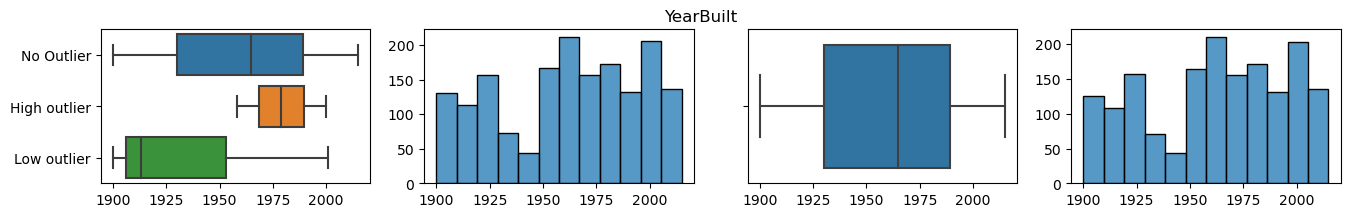

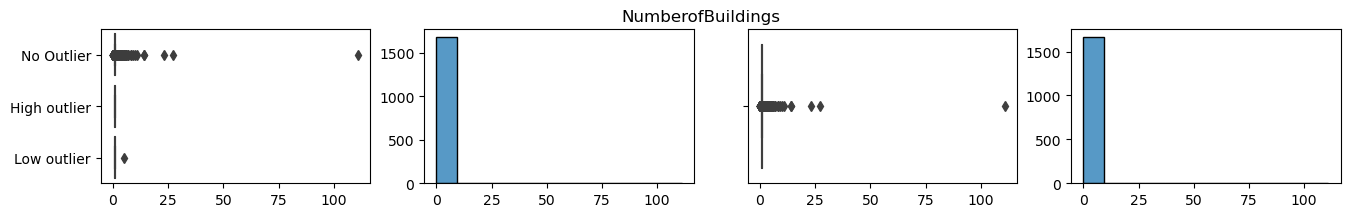

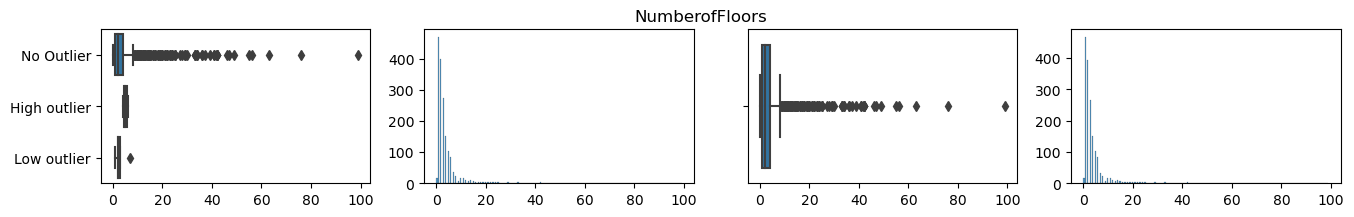

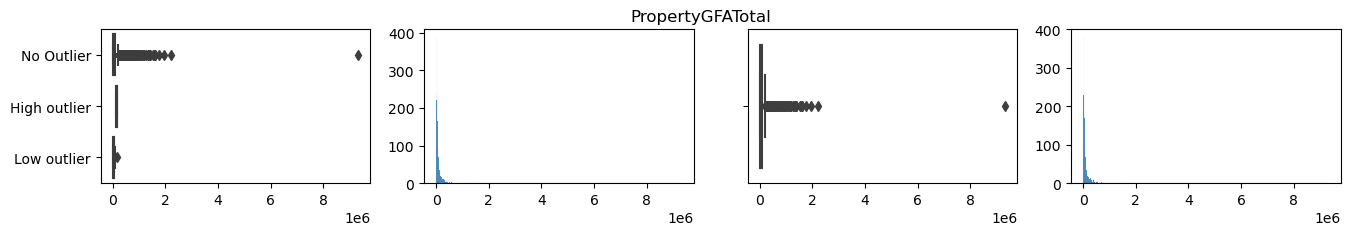

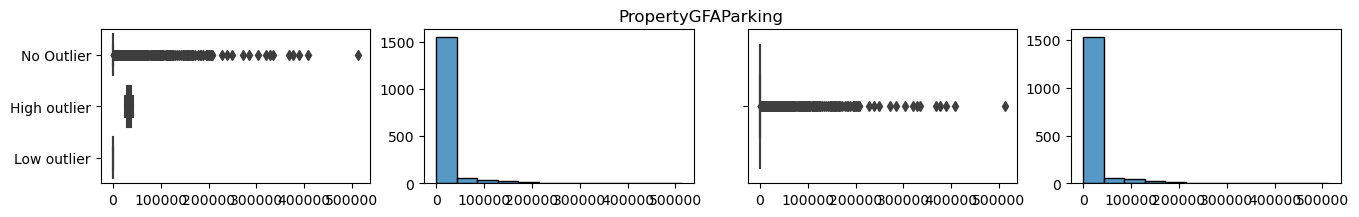

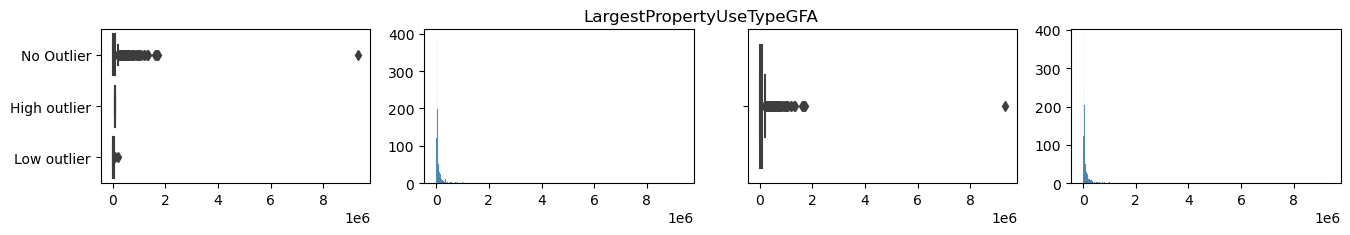

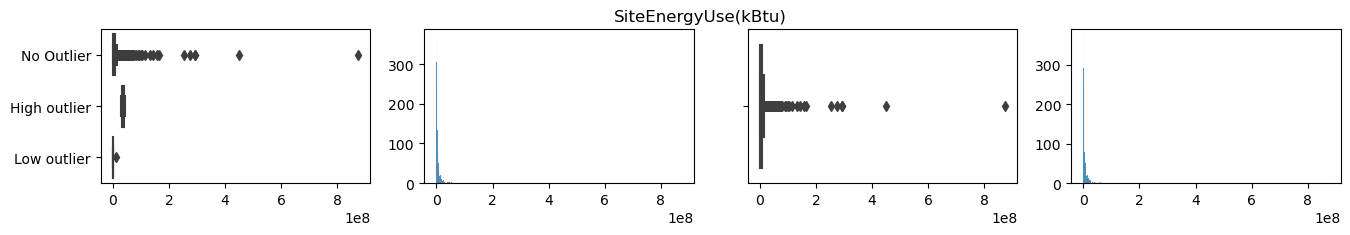

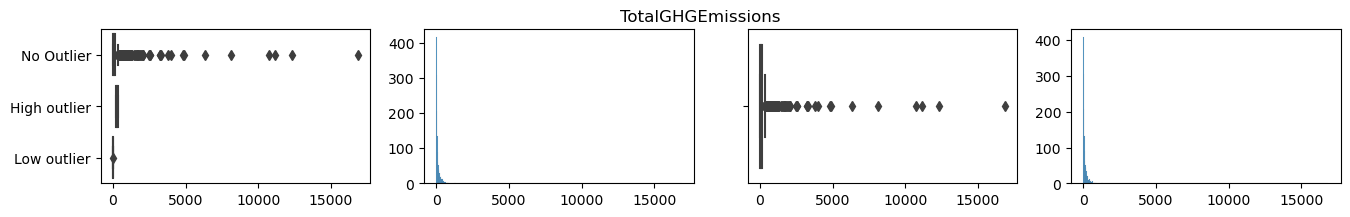

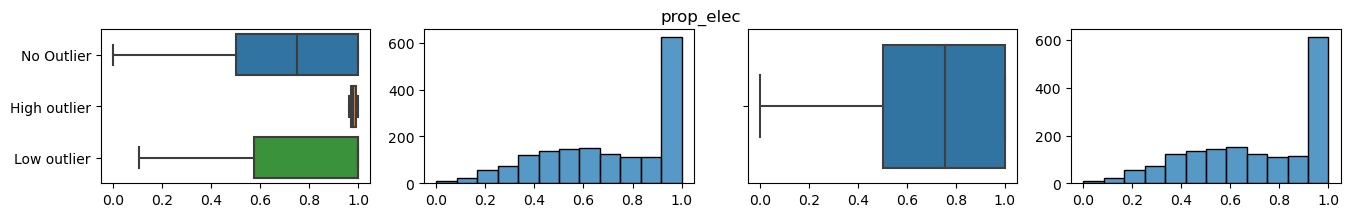

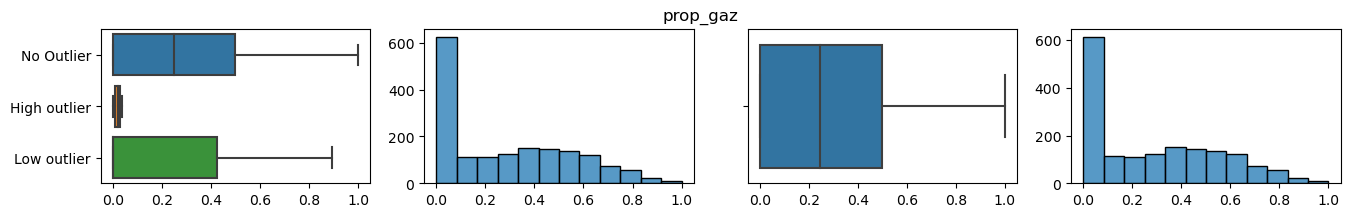

In [117]:
dft = df.copy()
dft.Outlier = df.Outlier.fillna('No Outlier')
dfno = dft[dft.Outlier == 'No Outlier']

for c in dft.columns:
    if dft[c].dtypes != 'object':
        f, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,2))
        plt.suptitle(c)
        g1 = sns.boxplot(x=c, y='Outlier', data=dft, ax=ax[0])
        g1.set(xlabel=None, ylabel=None)
        g2 = sns.histplot(x=c, data=dft, ax=ax[1])
        g2.set(xlabel=None, ylabel=None)
        g3 = sns.boxplot(x=c, data=dft, ax=ax[2])
        g3.set(xlabel=None)
        g4 = sns.histplot(x=c, data=dfno, ax=ax[3])
        g4.set(xlabel=None, ylabel=None)
        #plt.savefig("outliers"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()

In [118]:
dfg = dft.groupby(by='Outlier')

for c in dft.columns:
    print(c)
    print(dfg[c].describe())
    print('--------------------------------------------')

PrimaryPropertyType
             count unique                          top freq
Outlier                                                    
High outlier     2      1                 Large Office    2
Low outlier     17      8  Small- and Mid-Sized Office    5
No Outlier    1679     24  Small- and Mid-Sized Office  294
--------------------------------------------
YearBuilt
               count         mean        std     min     25%     50%     75%  \
Outlier                                                                        
High outlier     2.0  1979.000000  29.698485  1958.0  1968.5  1979.0  1989.5   
Low outlier     17.0  1930.941176  32.282872  1900.0  1906.0  1913.0  1953.0   
No Outlier    1679.0  1961.995831  32.724178  1900.0  1930.0  1965.0  1989.0   

                 max  
Outlier               
High outlier  2000.0  
Low outlier   2001.0  
No Outlier    2015.0  
--------------------------------------------
NumberofBuildings
               count      mean       std  min 

Les données estampillées 'Outlier' sont clairement des données extrêmes, néanmoins leur impact est relativement réduit. Il y a 2 outliers high et 17 outliers low.<br/>
Nous décidons quand même de les supprimer.

In [119]:
df = df[df.Outlier.isna()]
df = df.drop(['Outlier'], axis=1)

In [120]:
df.isna().sum()

PrimaryPropertyType           0
YearBuilt                     0
NumberofBuildings             2
NumberofFloors                0
PropertyGFATotal              0
PropertyGFAParking            0
LargestPropertyUseTypeGFA    12
SiteEnergyUse(kBtu)           3
TotalGHGEmissions             3
prop_elec                     9
prop_gaz                      9
dtype: int64

In [121]:
df = df.reset_index(drop=True)

##### [sommaire](#S)

### C, Les données manquantes et négatives <a class='anchor' id='IIC'></a>

In [122]:
print('Nous arrivons à un jeu de donné de {} lignes et {} colonnes'. format(df.shape[0], df.shape[1]))
print('Avec {} données manquantes, soit {:.2f}%'.format(df.isna().sum().sum(),((df.isna().sum().sum())/ df.shape[0]*df.shape[1])))

Nous arrivons à un jeu de donné de 1679 lignes et 11 colonnes
Avec 38 données manquantes, soit 0.25%


In [123]:
df[df.isna().any(axis=1)].shape

(19, 11)

Vu la faible quantité de données nulles, nous les supprimons.

In [124]:
df = df.dropna()

In [125]:
for c in df.columns:
    if df[c].dtypes != 'object':
        name = c
        valeur = df[df[c] < 0].shape[0]
        if valeur > 0:
            print(name, valeur)
            print(df[df[c] < 0].index)

TotalGHGEmissions 1
Int64Index([1588], dtype='int64')


In [126]:
df[df.index == 1588]

PrimaryPropertyType  YearBuilt  NumberofBuildings  \
1588  Small- and Mid-Sized Office       2013                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1588             6.0             52000                   0   

      LargestPropertyUseTypeGFA  SiteEnergyUse(kBtu)  TotalGHGEmissions  \
1588                    48159.0          342726.0938               -0.8   

      prop_elec  prop_gaz  
1588        1.0      -0.0

On remarque qu'il y a une ligne ayant une valeur negatives pour la colonne GHGE. <br/>
Techniquement cela est possible si ce batîment produit de l'énergie de manière propre et en quantité suffisante pour contre balancer son empreinte carbonne, néanmoins, et avec le peu de données complémentaires dont nous disposons, nous préférons l'écarter.

In [127]:
df = df.drop(1588, axis=0)

##### [sommaire](#S)

### D, La colonne Primary property type <a class='anchor' id='IID'></a>

Ensuite, la colonne concernant l'usage principal de la propriété contient des valeurs en doubles, des habitations et 3 dénominations pour les hangars.<br/>
Nous corrigeons cela.

In [128]:
df.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office', 'Non-Refrigerated Warehouse', 'Restaurant\n'],
      dtype=object)

In [129]:
liste = df.PrimaryPropertyType.map(lambda x: x.rstrip('\n'))
df.PrimaryPropertyType = liste

In [130]:
df = df[~df.PrimaryPropertyType.str.contains('family')]

In [131]:
df[df.PrimaryPropertyType.str.contains('Warehouse')].PrimaryPropertyType.value_counts()

Warehouse                     187
Refrigerated Warehouse         12
Non-Refrigerated Warehouse      1
Name: PrimaryPropertyType, dtype: int64

In [132]:
df1 = df.copy()

In [133]:
df1.loc[df1.PrimaryPropertyType.str.contains('Warehouse'), 'PrimaryPropertyType'] = 'Warehouse'

In [134]:
df1.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Restaurant', 'Office'], dtype=object)

In [135]:
df = df1.copy()

In [136]:
df = df.reset_index(drop=True)

In [137]:
print('Nous arrivons à un jeu de donné de {} lignes et {} colonnes'. format(df.shape[0], df.shape[1]))
print('Avec {} données manquantes, soit {:.2f}%'.format(df.isna().sum().sum(),((df.isna().sum().sum())/ df.shape[0]*df.shape[1])))

Nous arrivons à un jeu de donné de 1657 lignes et 11 colonnes
Avec 0 données manquantes, soit 0.00%


##### [sommaire](#S)

## III, Analyse des données <a class='anchor' id='III'></a>

### A, Première analyse <a class='anchor' id='IIIA'></a>

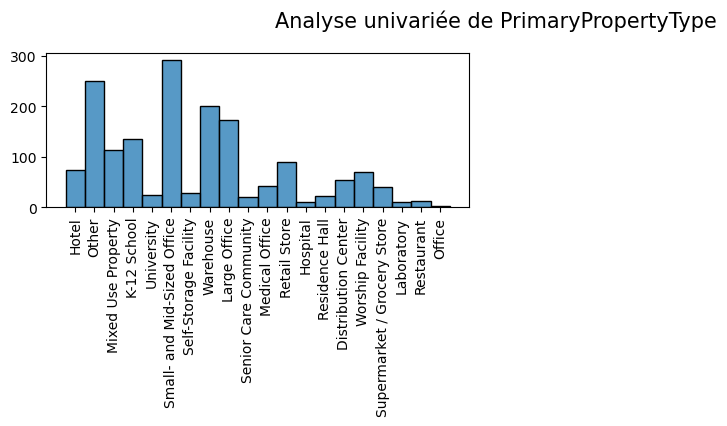

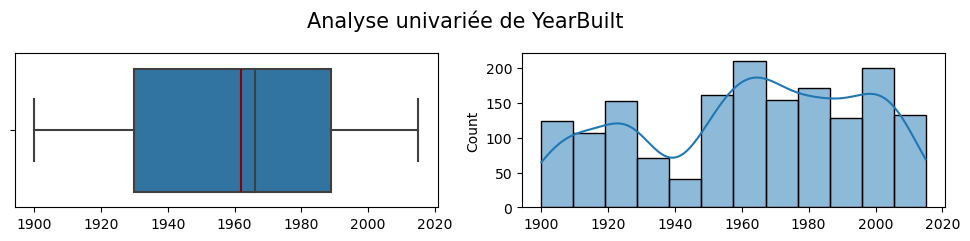

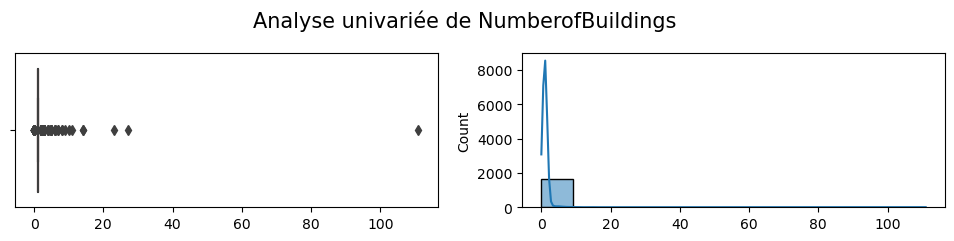

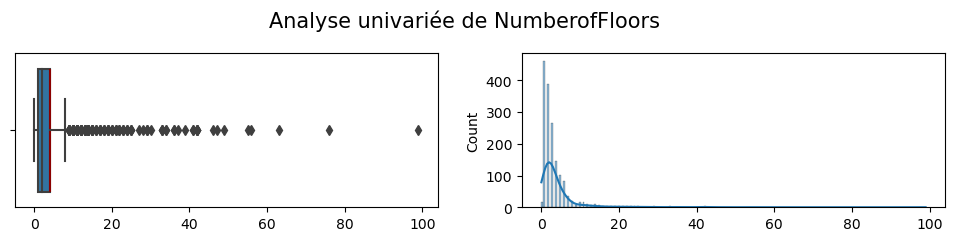

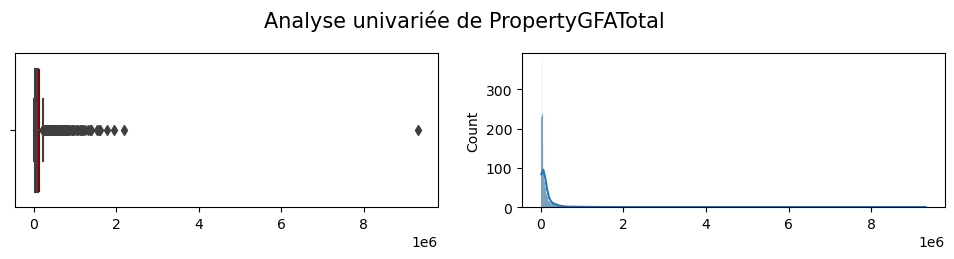

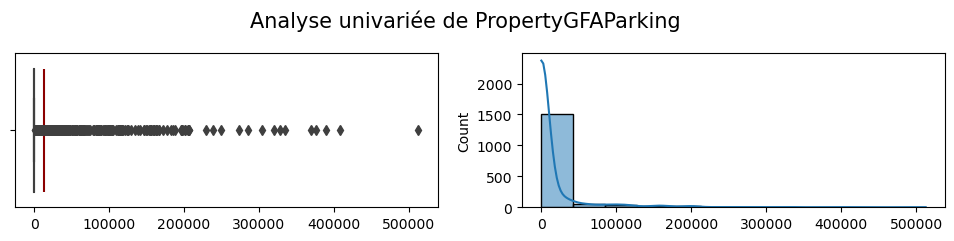

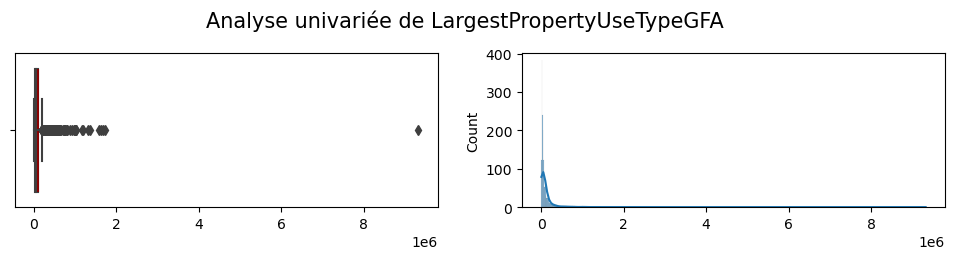

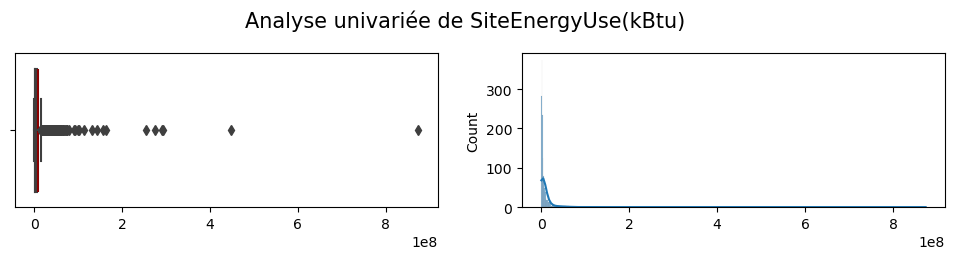

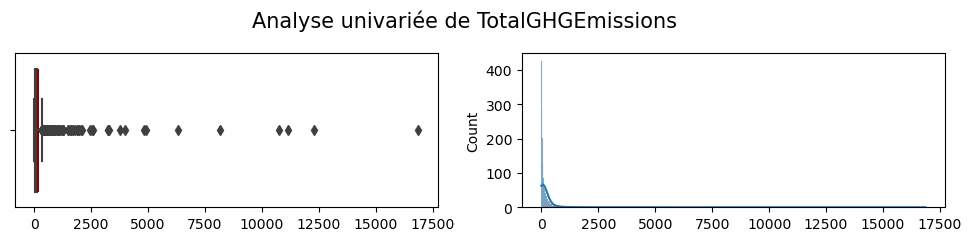

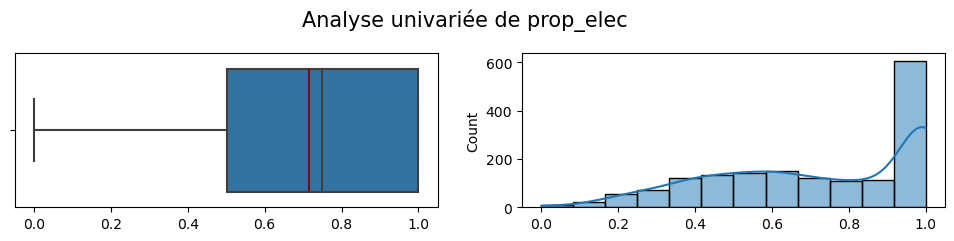

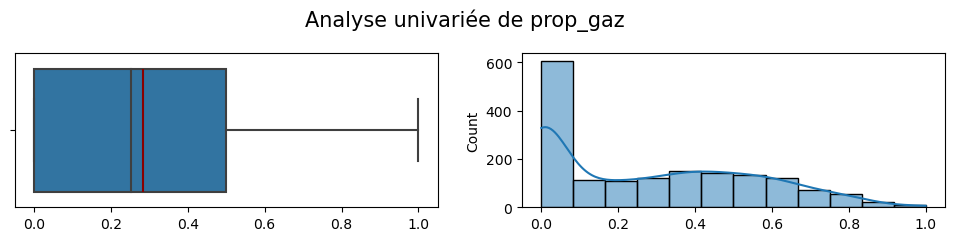

In [54]:
for c in df.columns:
    if df[c].dtypes != 'object':
        f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,2))
        plt.suptitle("Analyse univariée de {}".format(c), fontsize=15, y=1.1)
        g1 = sns.boxplot(x=c, data=df, ax=ax[0])
        g1.vlines(df[c].mean(), ymin=-0.4, ymax=0.4, color='darkred')
        g1.set(xlabel=None)
        g2 = sns.histplot(x=c, data=df, kde=True, ax=ax[1])
        g2.set(xlabel=None)
        #plt.savefig("univarie_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()
    else:
        f, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,2))
        plt.suptitle("Analyse univariée de {}".format(c), fontsize=15, y=1.1)
        g1 = sns.histplot(x=c, data=df, ax=ax[0])
        plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
        g1.set(xlabel=None, ylabel=None)
        ax[1].set_visible(False)
        #plt.savefig("univarie_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()

L'analyse graphique des variables nous montre que les valeurs sont très disparate.<br/>
Afin de corriger cet effet nous décidons de passer nos données à l'échelle logarithmique.

##### [sommaire](#S)

### B, Analyse logarithmique <a class='anchor' id='IIIB'></a>

In [55]:
dfl = df.copy()

In [56]:
# Ajout constante pour passage au log
for c in dfl.columns[2:]:
    if dfl[dfl[c] == 0].shape[0] != 0:
        dfl[c] = dfl[c]+1

In [57]:
for c in dfl.columns[2:]:
    if dfl[c].dtypes != 'object':
        dfl[c] = np.log(dfl[c])

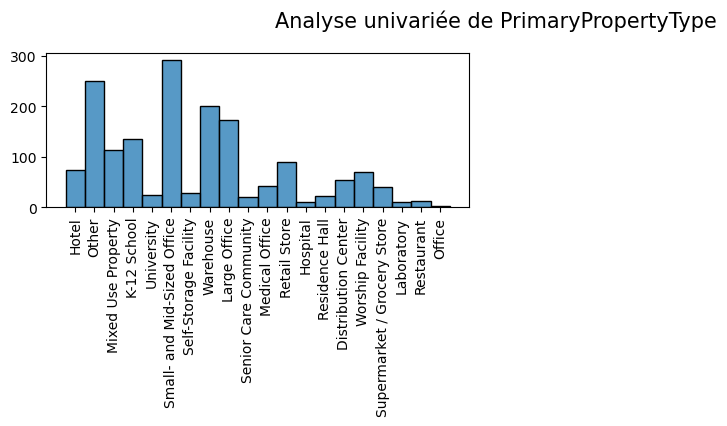

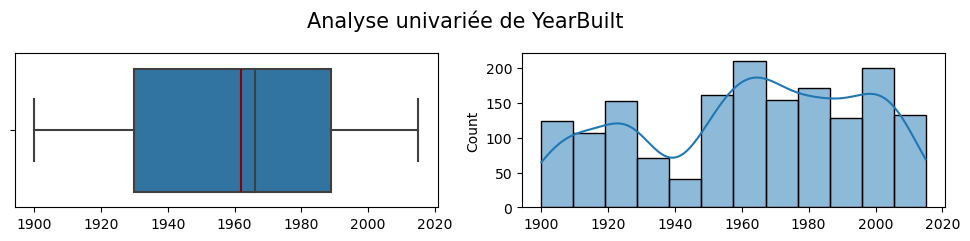

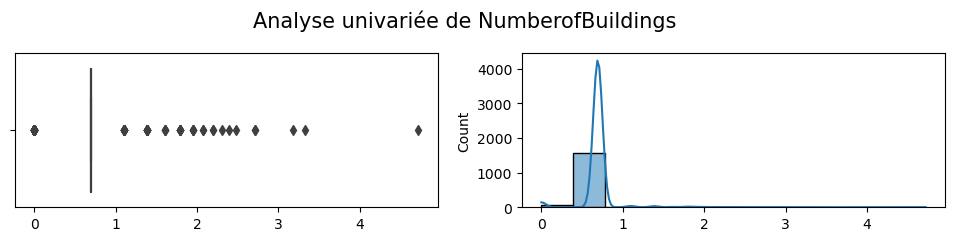

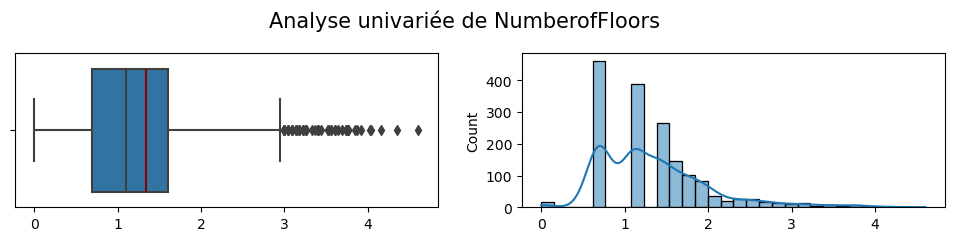

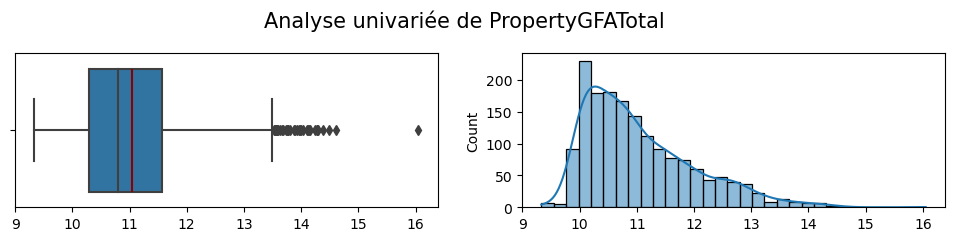

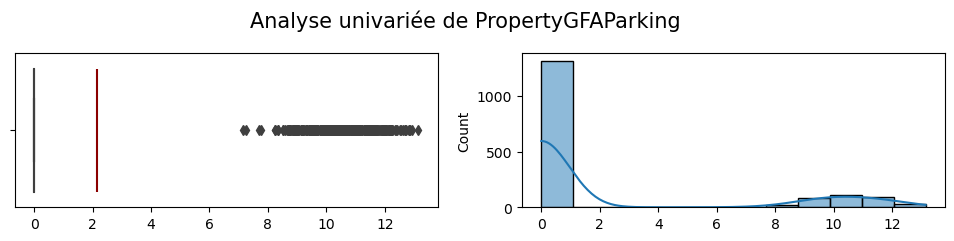

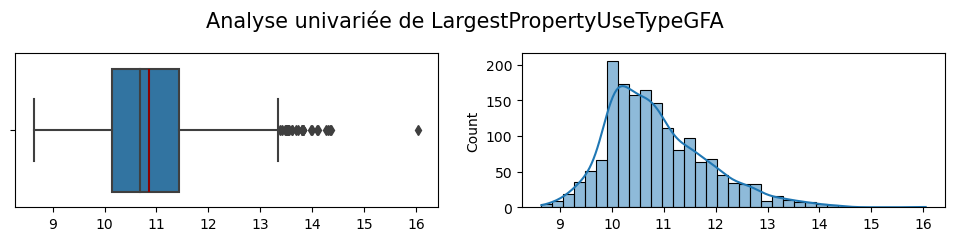

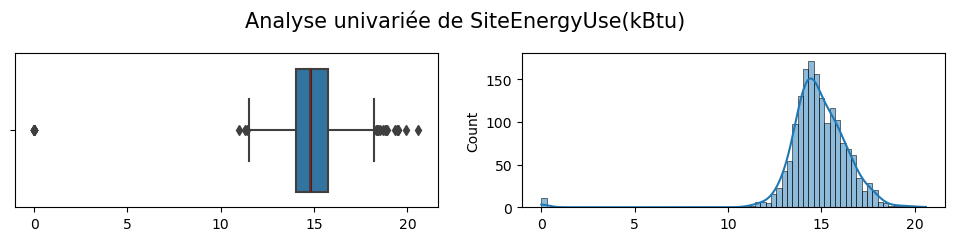

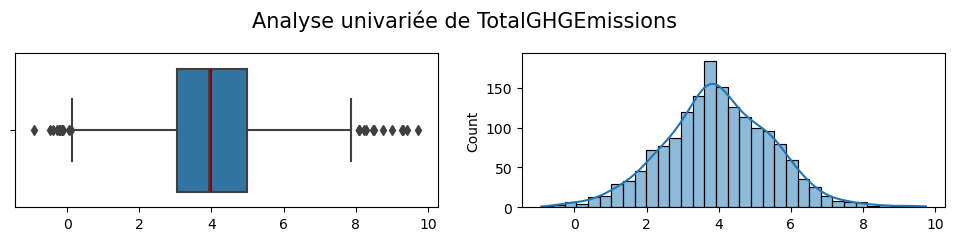

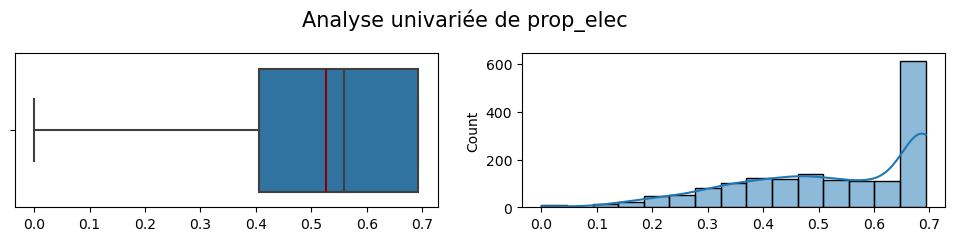

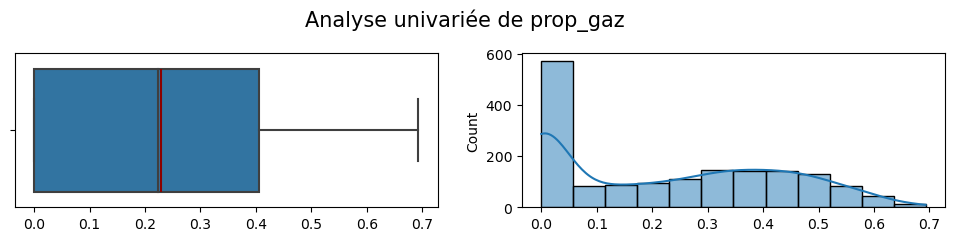

In [58]:
for c in dfl.columns:
    if dfl[c].dtypes != 'object':
        f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,2))
        plt.suptitle("Analyse univariée de {}".format(c), fontsize=15, y=1.1)
        g1 = sns.boxplot(x=c, data=dfl, ax=ax[0])
        g1.vlines(dfl[c].mean(), ymin=-0.4, ymax=0.4, color='darkred')
        g1.set(xlabel=None)
        g2 = sns.histplot(x=c, data=dfl, kde=True, ax=ax[1])
        g2.set(xlabel=None)
        #plt.savefig("univarie_log_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()
    else:
        f, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,2))
        plt.suptitle("Analyse univariée de {}".format(c), fontsize=15, y=1.1)
        g1 = sns.histplot(x=c, data=dfl, ax=ax[0])
        plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
        g1.set(xlabel=None, ylabel=None)
        ax[1].set_visible(False)
        #plt.savefig("univarie_log_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()

In [59]:
dfl.describe()

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count  1657.000000        1657.000000     1657.000000       1657.000000   
mean   1962.032589           0.703997        1.336672         11.049352   
std      32.692428           0.252180        0.658702          0.959895   
min    1900.000000           0.000000        0.000000          9.331230   
25%    1930.000000           0.693147        0.693147         10.288750   
50%    1966.000000           0.693147        1.098612         10.805274   
75%    1989.000000           0.693147        1.609438         11.571581   
max    2015.000000           4.718499        4.605170         16.047690   

       PropertyGFAParking  LargestPropertyUseTypeGFA  SiteEnergyUse(kBtu)  \
count         1657.000000                1657.000000          1657.000000   
mean             2.139951                  10.860354            14.845033   
std              4.259863                   0.971979             1.770556   
min              0.000000                   8.640472             0.000000   
25%              0.000000                  10.148862            14.045527   
50%              0.000000                  10.690125            14.769399   
75%              0.000000                  11.432799            15.755820   
max             13.147269                  16.047690            20.588504   

       TotalGHGEmissions    prop_elec     prop_gaz  
count        1657.000000  1657.000000  1657.000000  
mean            3.981094     0.527127     0.229049  
std             1.500960     0.164025     0.203054  
min            -0.916291     0.000000     0.000000  
25%             3.033991     0.406016     0.000000  
50%             3.925334     0.558995     0.224012  
75%             4.980039     0.693147     0.404914  
max             9.733350     0.693147     0.693147

Nous constatons deux choses :<br/>
<ul> Les variables de destination ressemblent à des courbes gaussiennes</ul>
<ul> Il y a encore des outliers </ul>

Afin de produire une simulation la plus standard possible, nous allons essaye de détecter ces outliers avec l'algorithme "Isolation forest".<br/>
Ensuite nous ferons des tests de normalité des varibles de destination.


##### [sommaire](#S)

### C, Première analyse bivariée <a class='anchor' id='IIIC'></a>

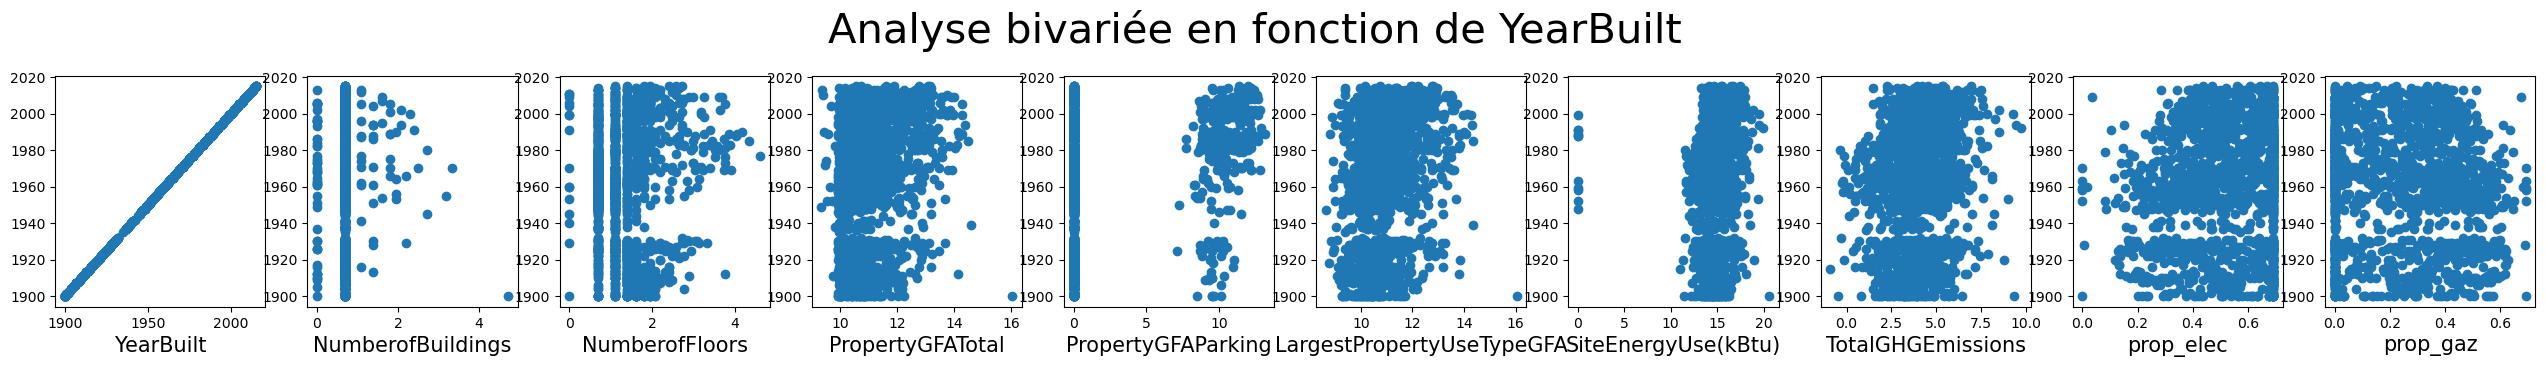

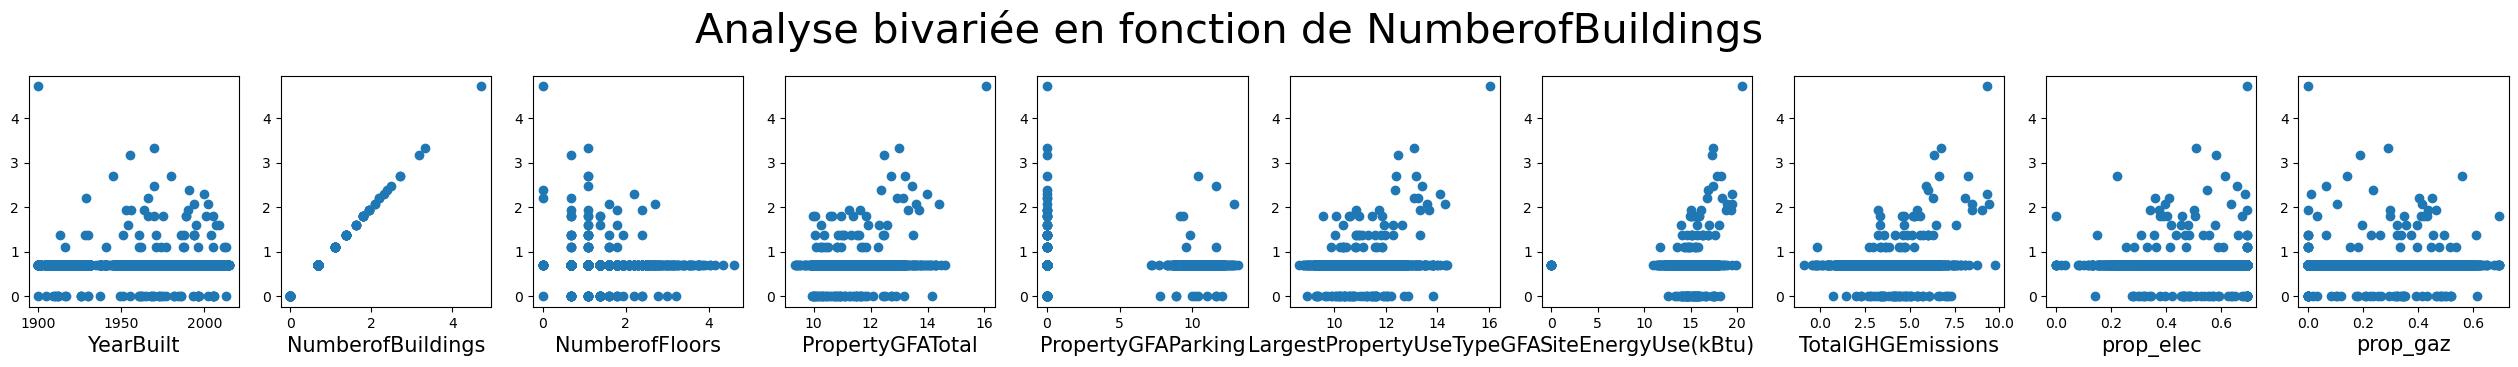

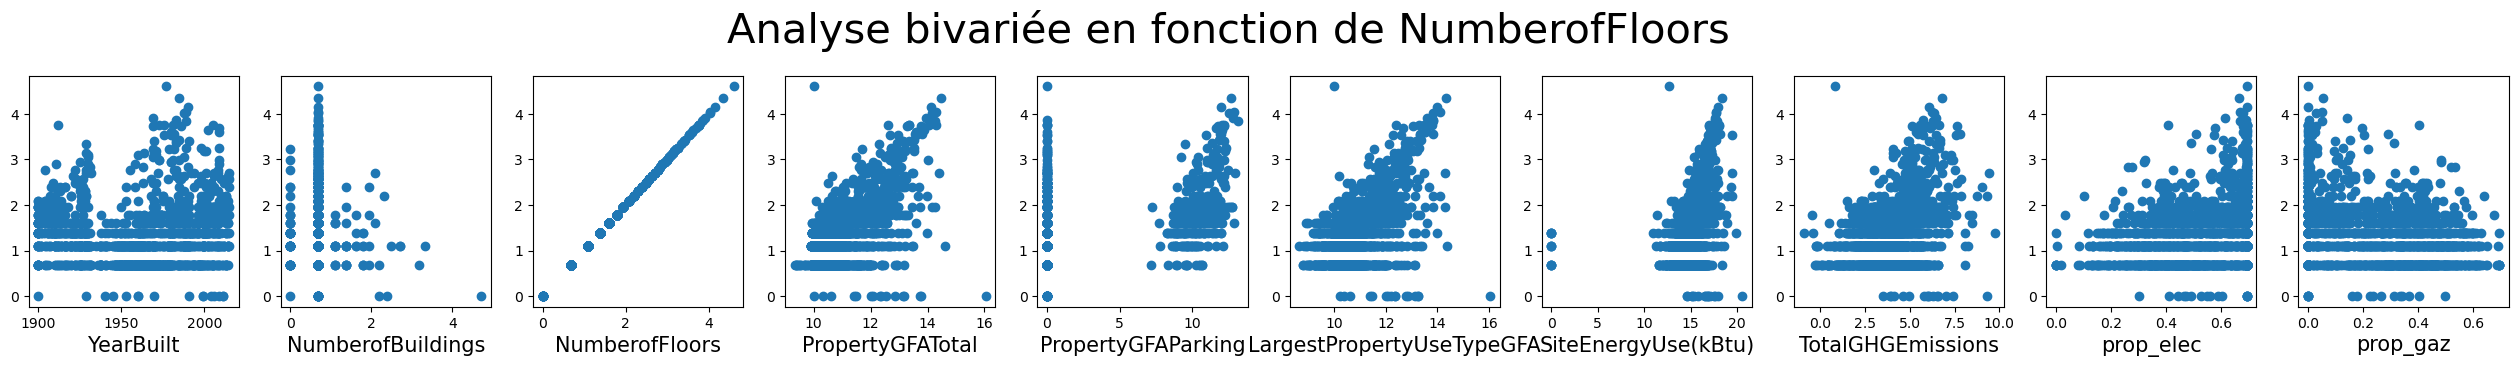

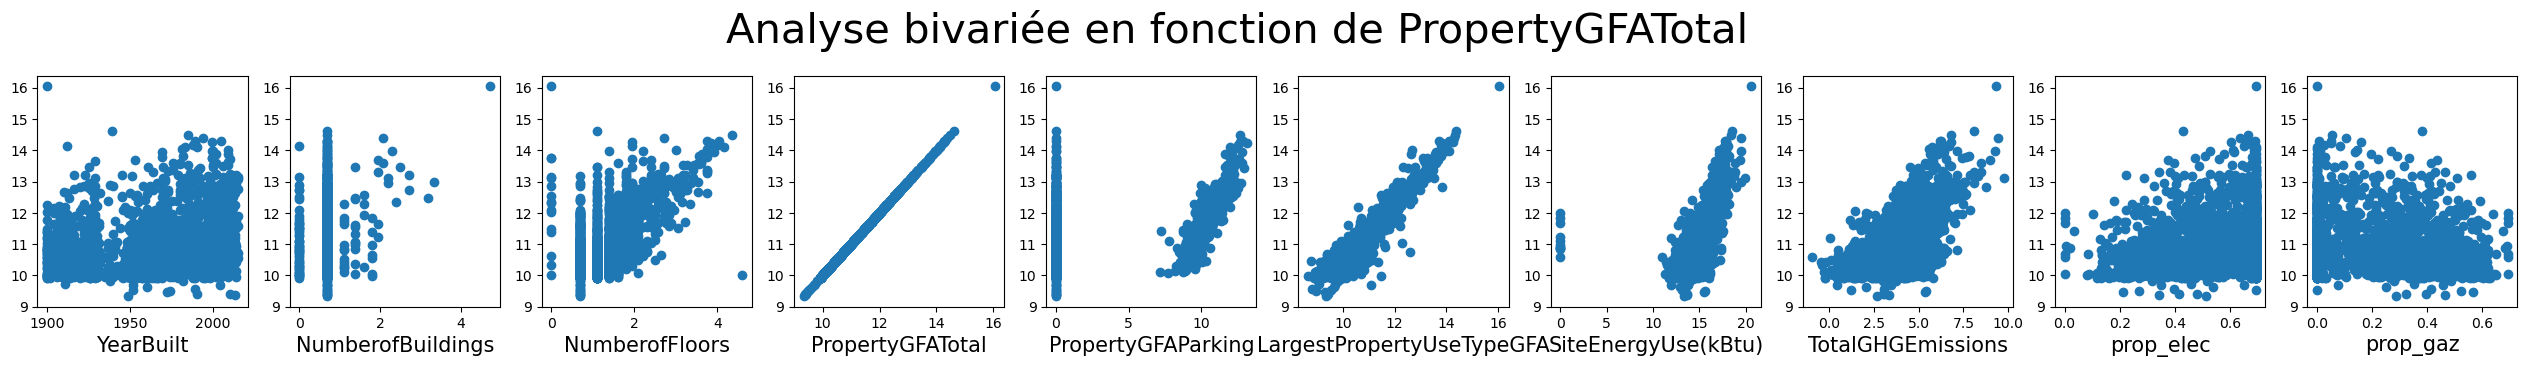

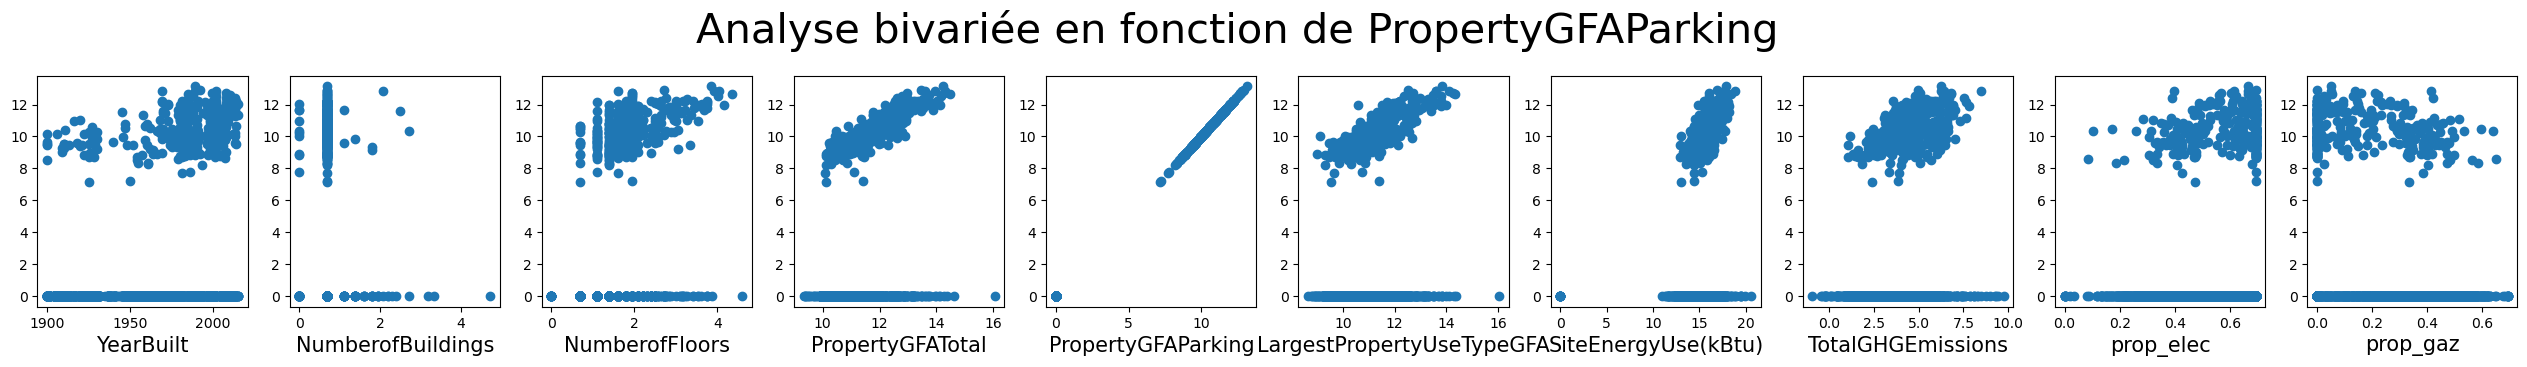

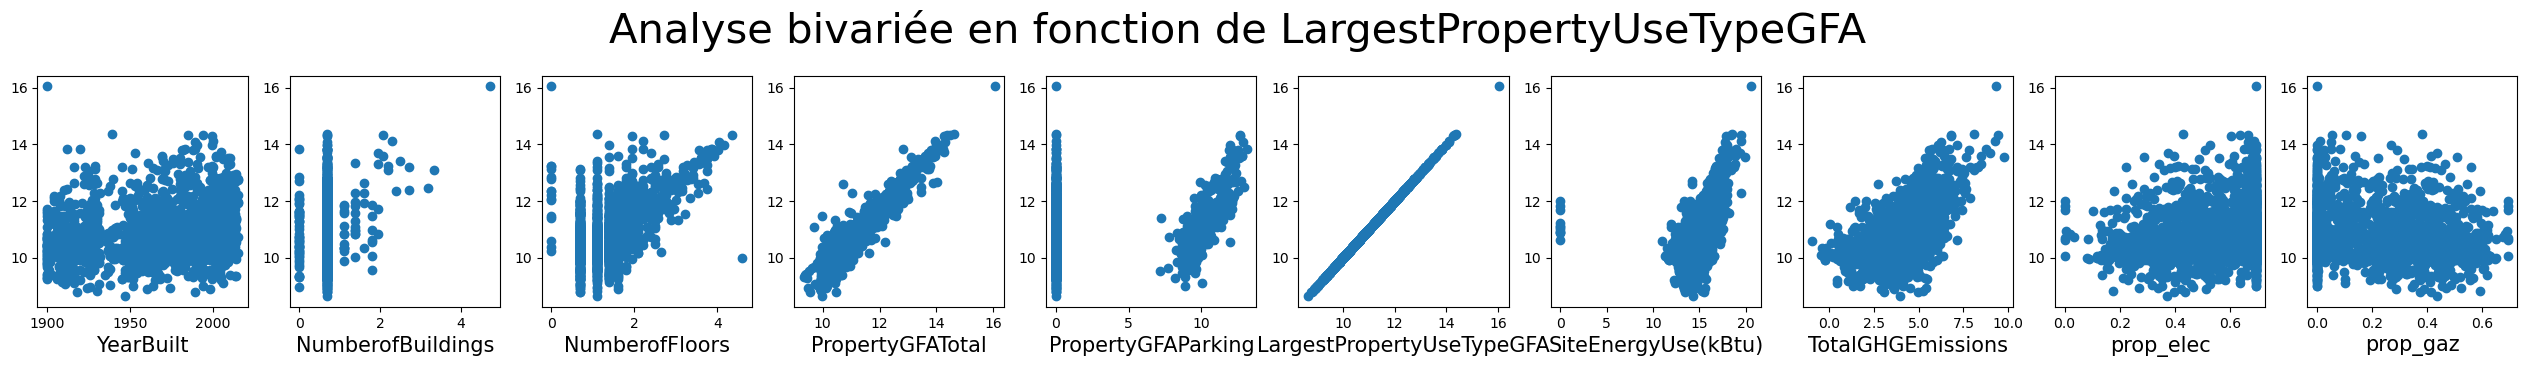

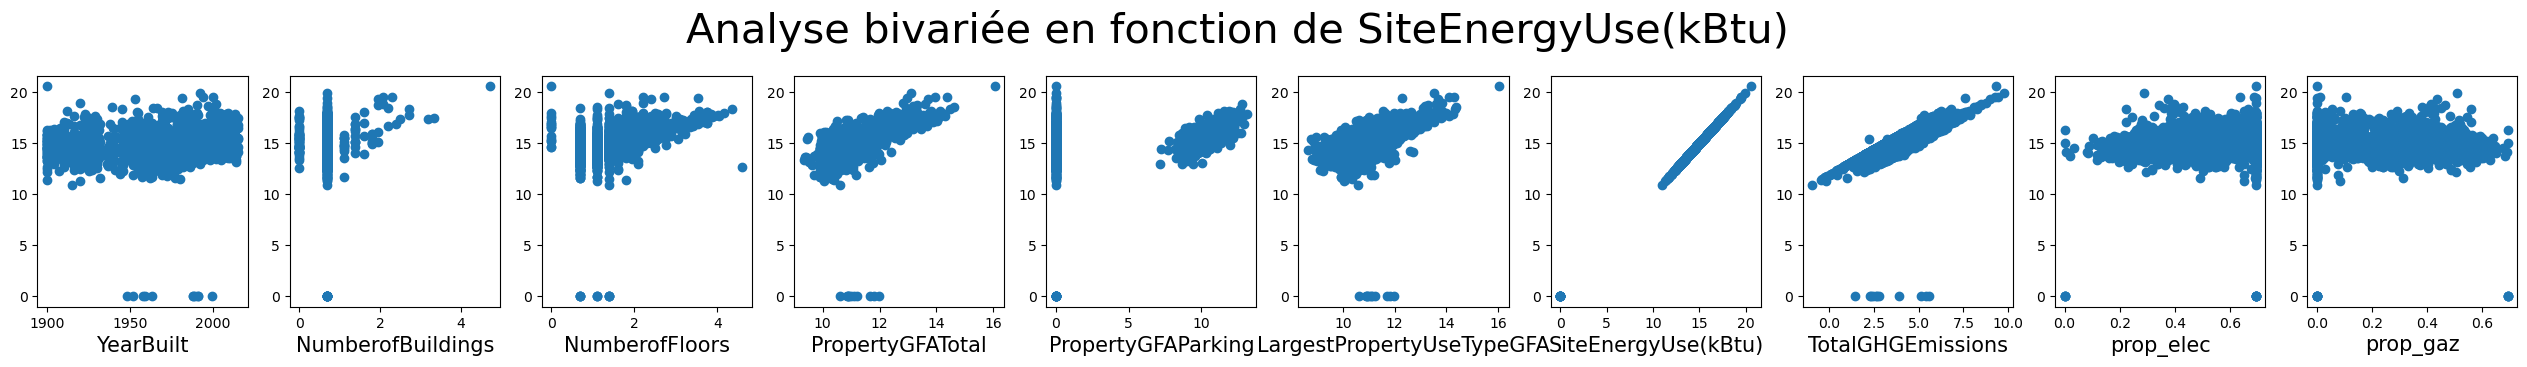

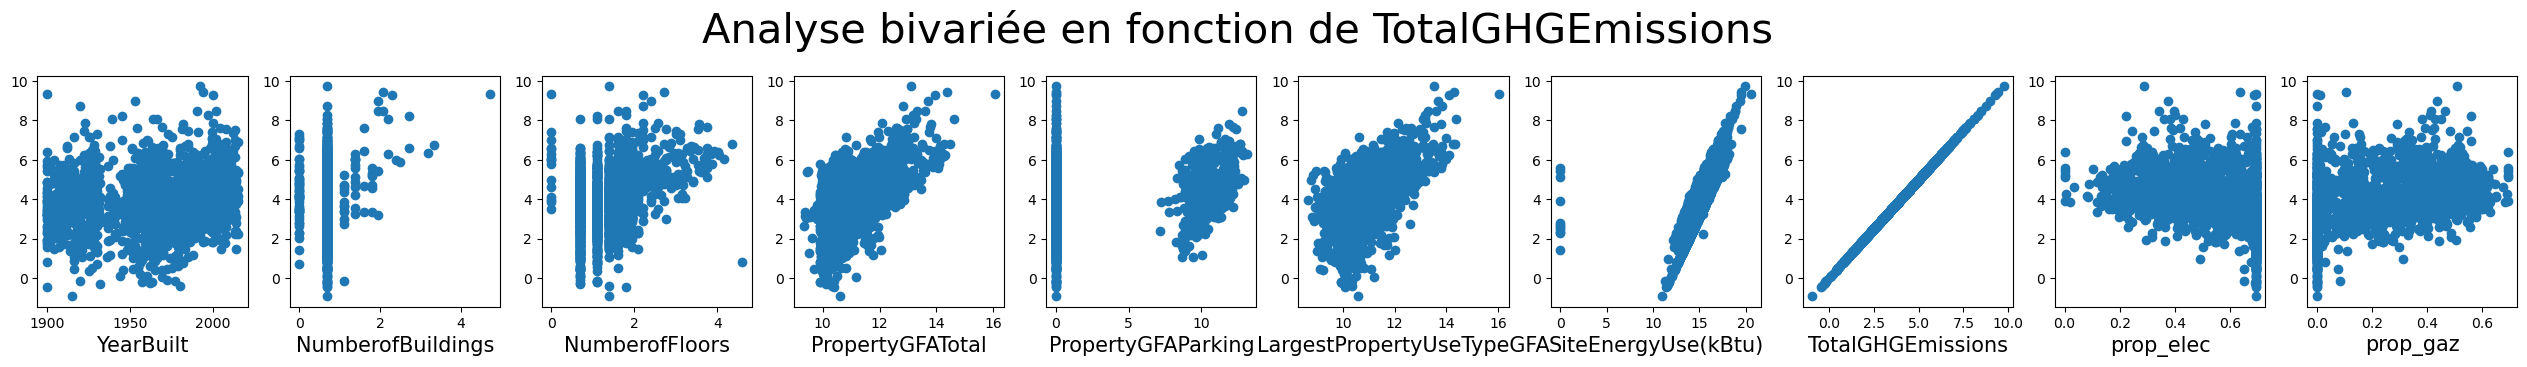

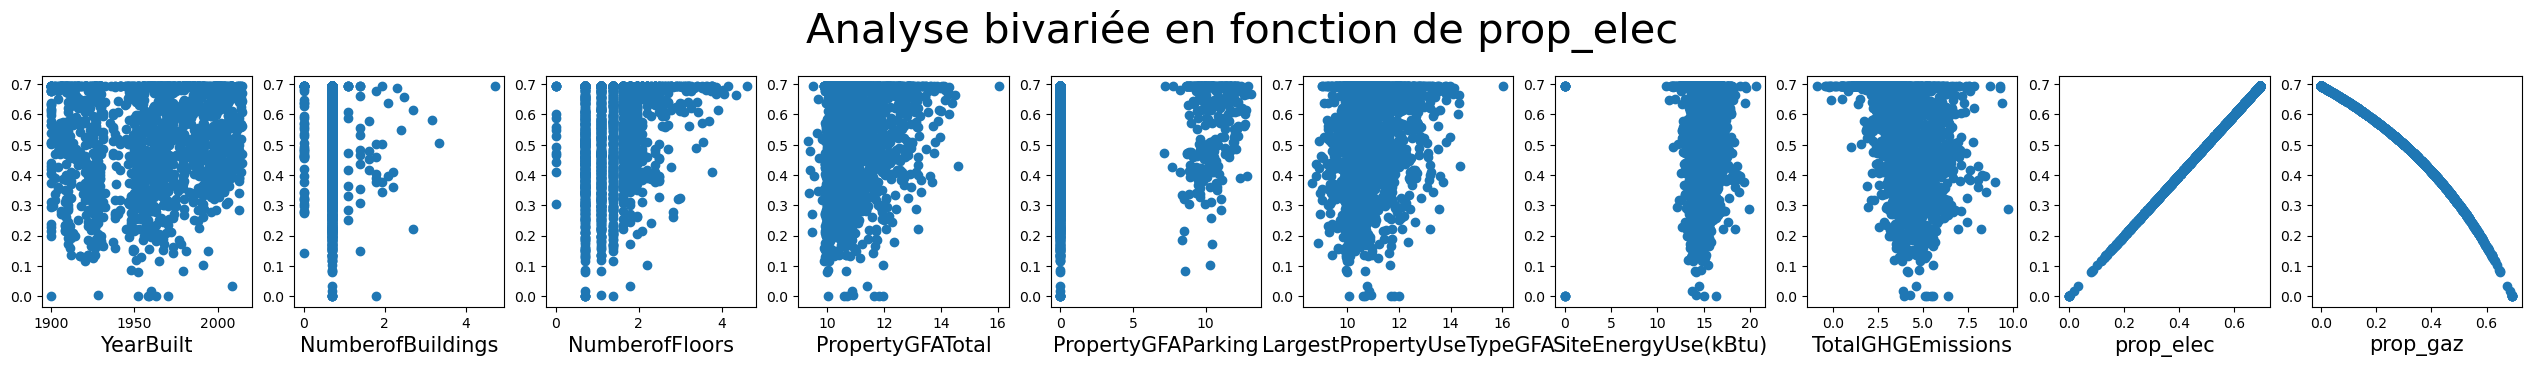

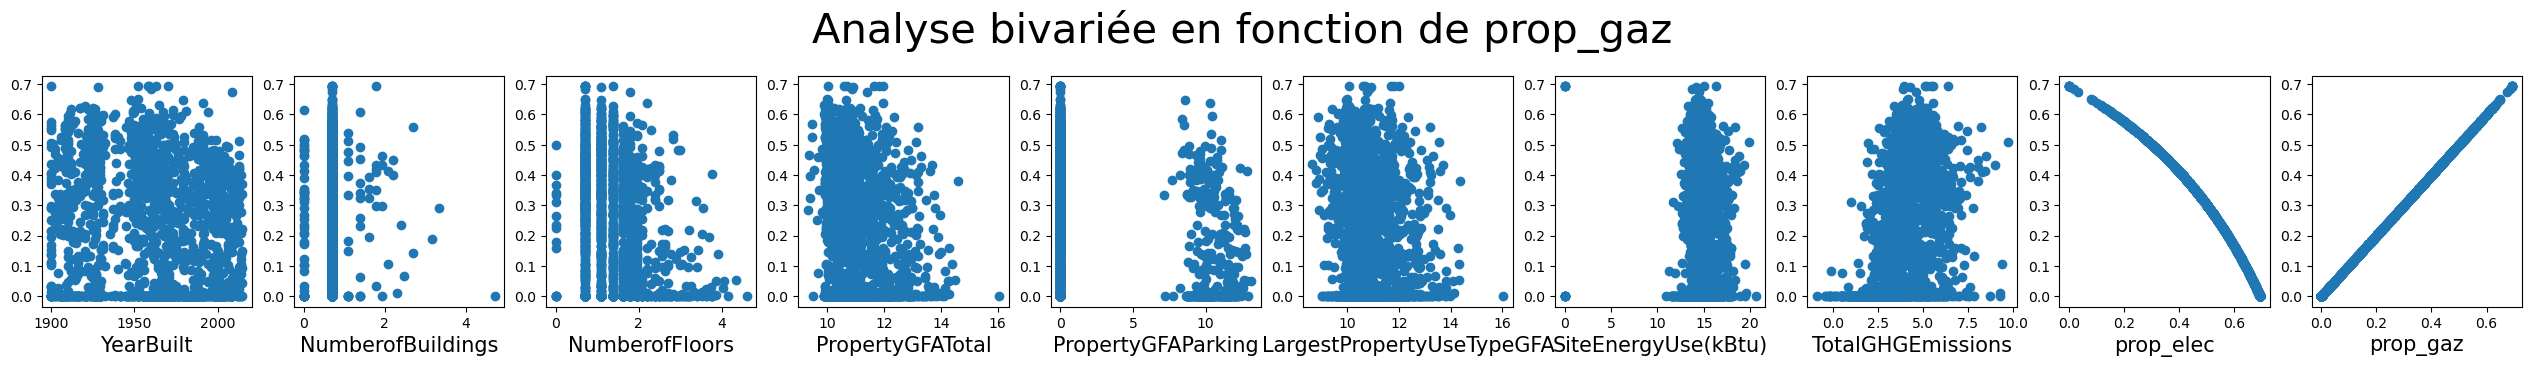

In [60]:
liste = []

for c in dfl.columns:
    if dfl[c].dtypes != 'object':
        liste.append(c)

dft = dfl.loc[:,liste]
for c in range(len(dft.columns)):
    f, ax = plt.subplots(nrows=1, ncols=dft.shape[1], figsize=(32,3))
    for i in range(len(dft.columns)):
        plt.suptitle('Analyse bivariée en fonction de {}'.format(dft.columns[c]), fontsize=30, y=1.1)
        ax[i].scatter(dft.iloc[:,[i]], dft.iloc[:,[c]])
        ax[i].set_xlabel(dft.columns[i], fontsize=15)
    #plt.savefig("premiere_bivarie_"+dft.columns[c]+".png", bbox_inches='tight', transparent=True)
    plt.show()

### D, Détection d'outliers par la méthode isolation forest <a class='anchor' id='IIID'></a>

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
dfw = dfl.copy()

In [63]:
for c in dfw.columns:
    if dfw[c].dtypes == 'object':
        le = LabelEncoder()
        dfw[c].fillna('None', inplace=True)
        le.fit(list(df[c].astype(str).values))
        dfw[c] = le.transform(list(df[c].astype(str).values))

In [64]:
dfw.head(2)

PrimaryPropertyType  YearBuilt  NumberofBuildings  NumberofFloors  \
0                    2       1927           0.693147        2.564949   
1                    2       1996           0.693147        2.484907   

   PropertyGFATotal  PropertyGFAParking  LargestPropertyUseTypeGFA  \
0         11.390012            0.000000                  11.390012   
1         11.547964            9.620129                  11.337142   

   SiteEnergyUse(kBtu)  TotalGHGEmissions  prop_elec  prop_gaz  
0            15.793246           5.521381   0.562802  0.218666  
1            15.942305           5.689886   0.326861  0.478338

In [65]:
from sklearn.ensemble import IsolationForest

In [66]:
ift = IsolationForest(n_estimators=1000, contamination ='auto')
ift.fit(dfw)

IsolationForest(n_estimators=1000)

In [67]:
dfw['iforest'] = pd.Series(ift.predict(dfw))

In [68]:
dfw.iforest.value_counts()

 1    1468
-1     189
Name: iforest, dtype: int64

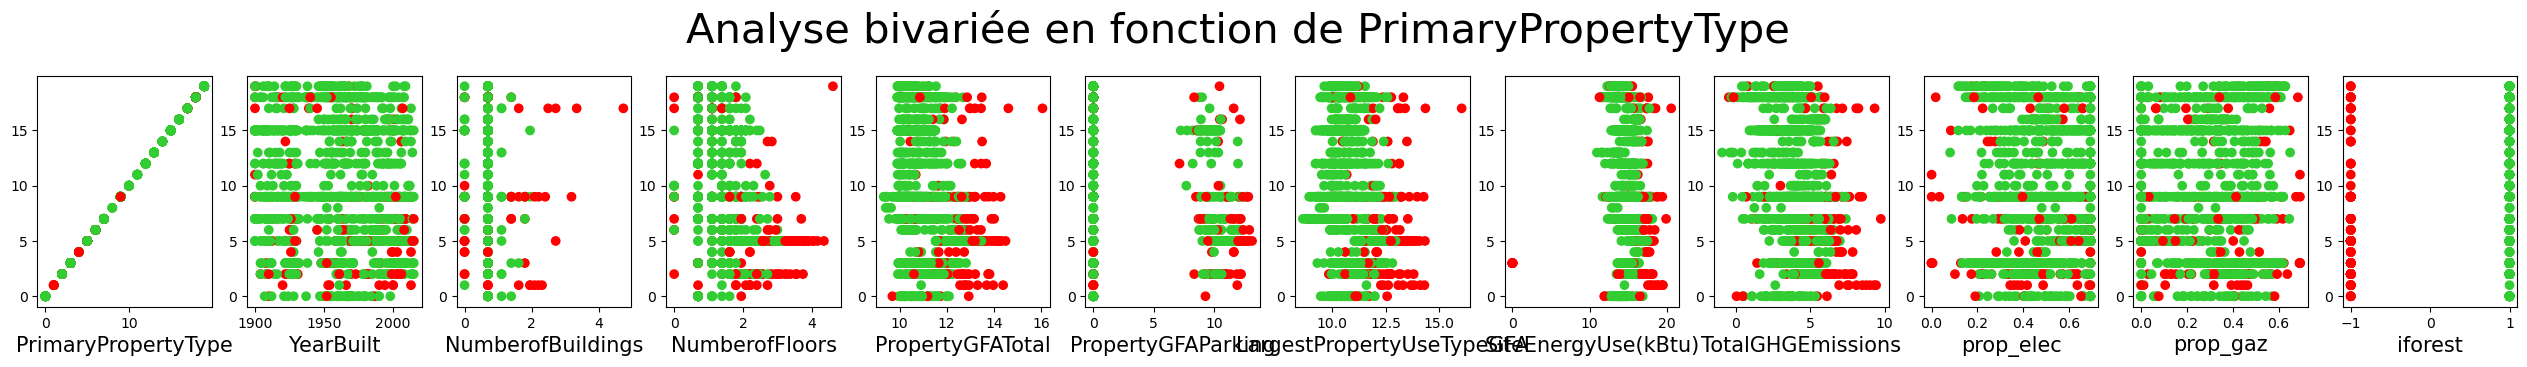

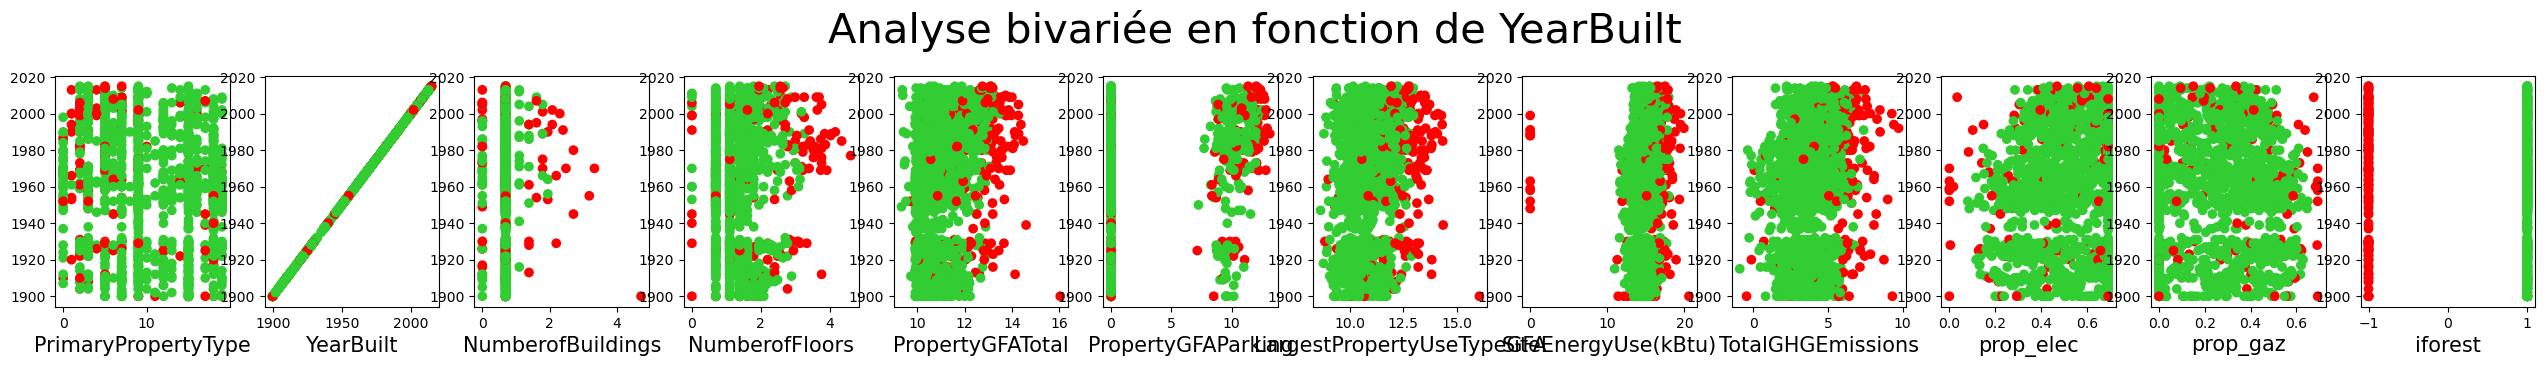

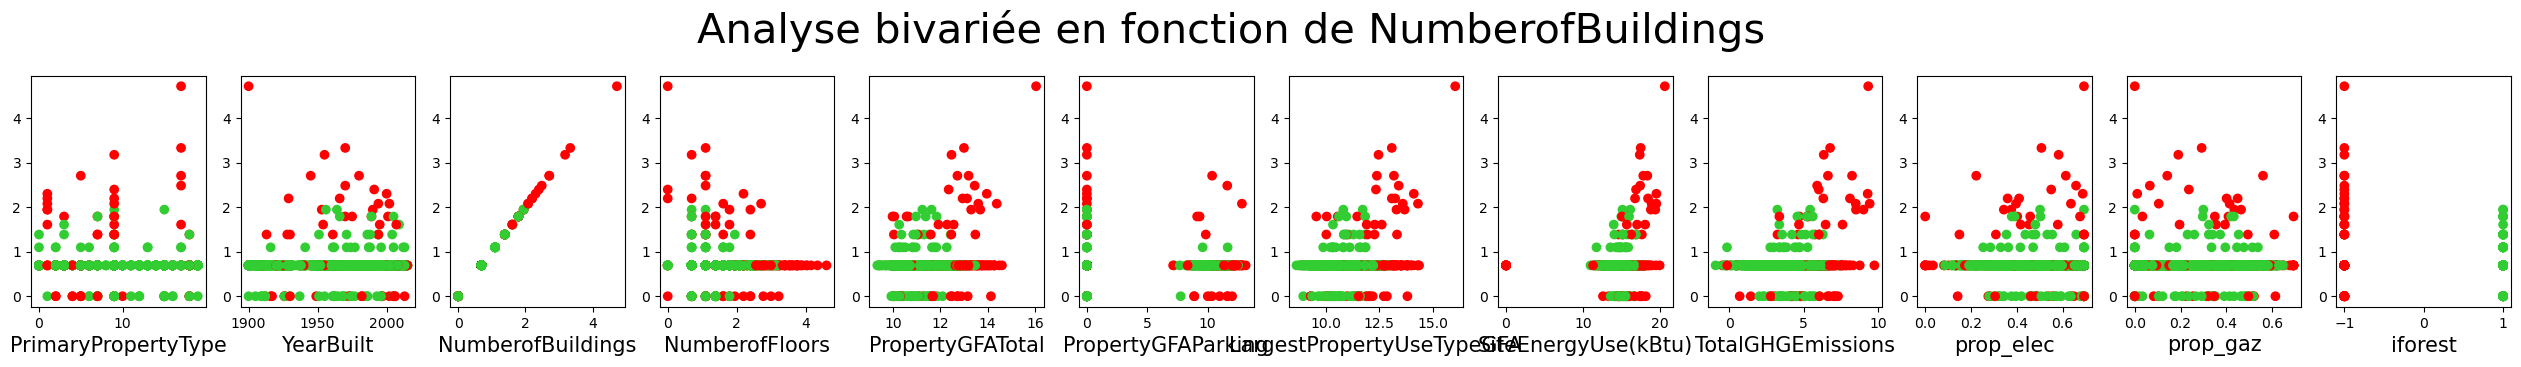

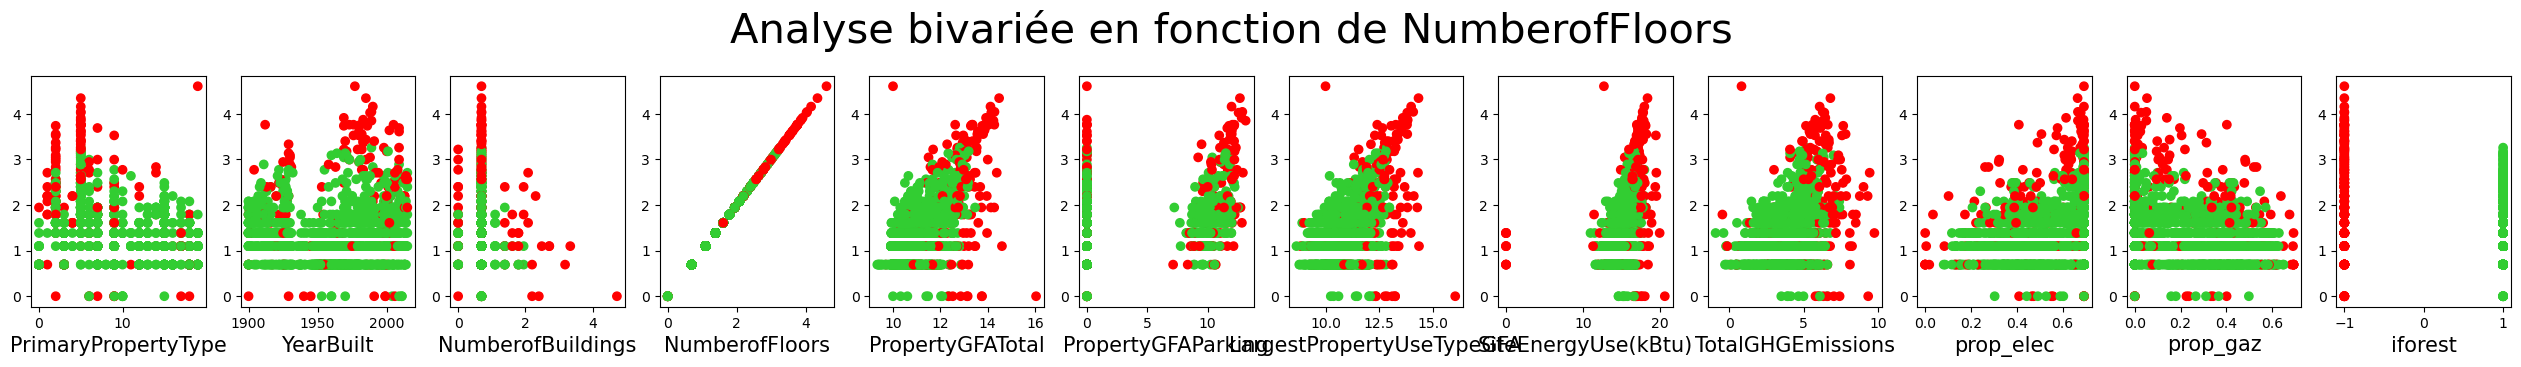

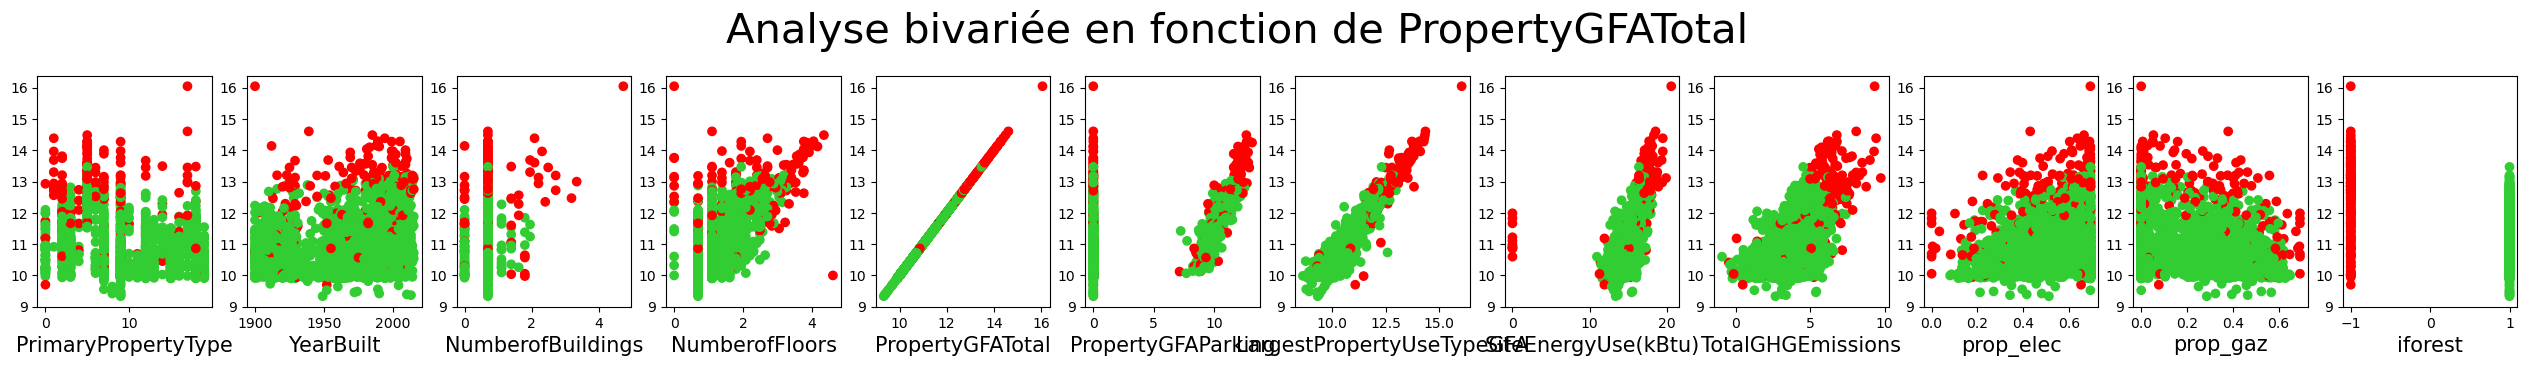

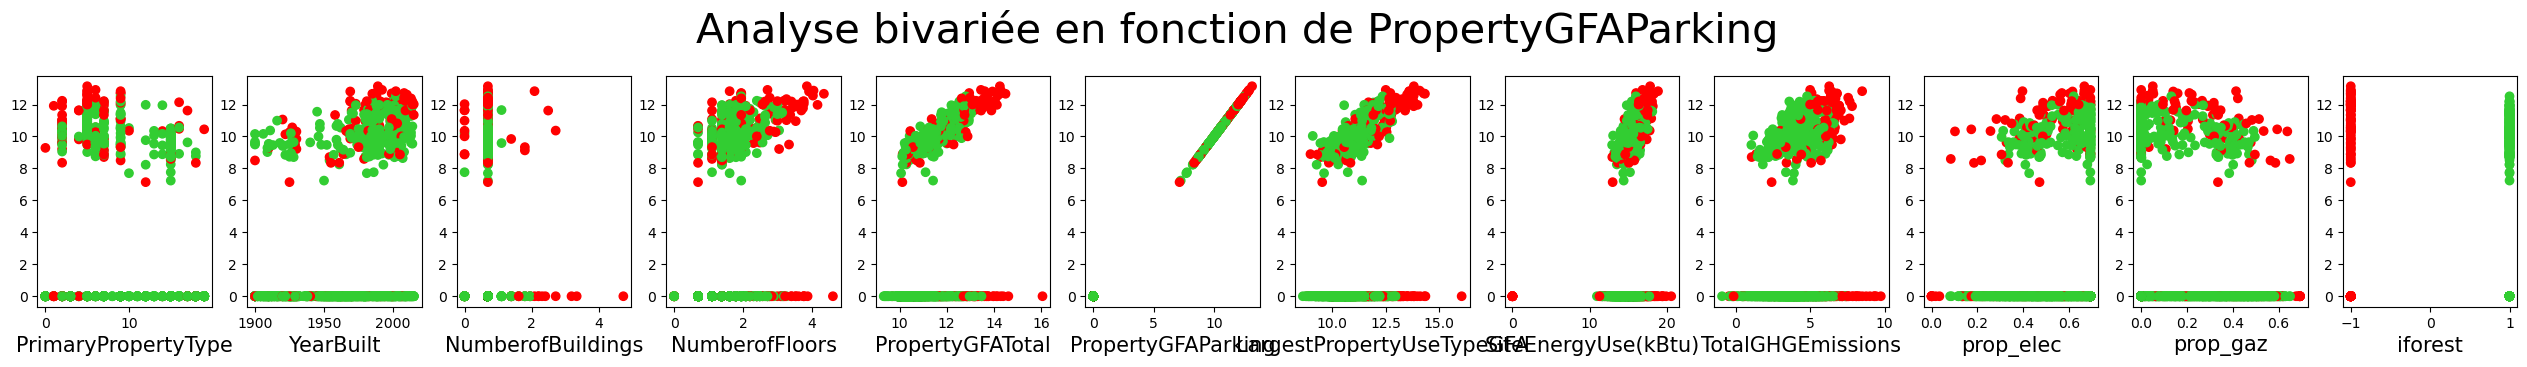

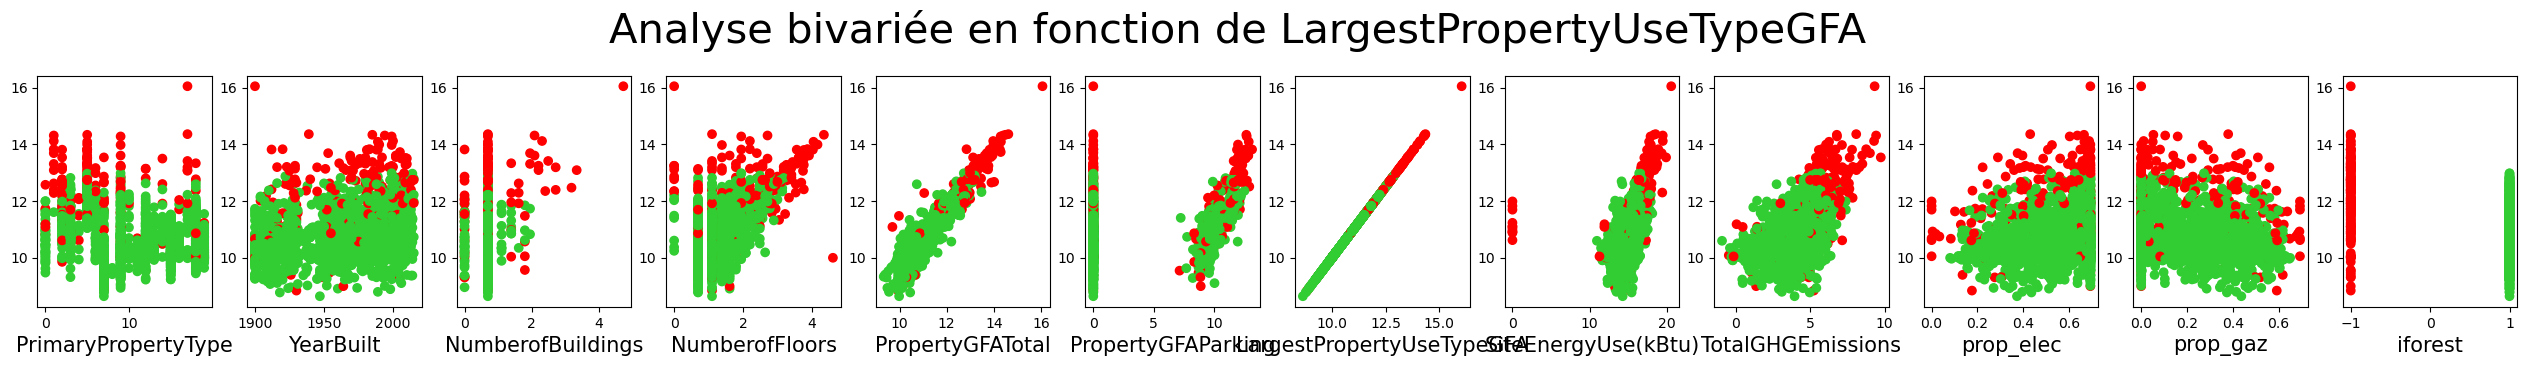

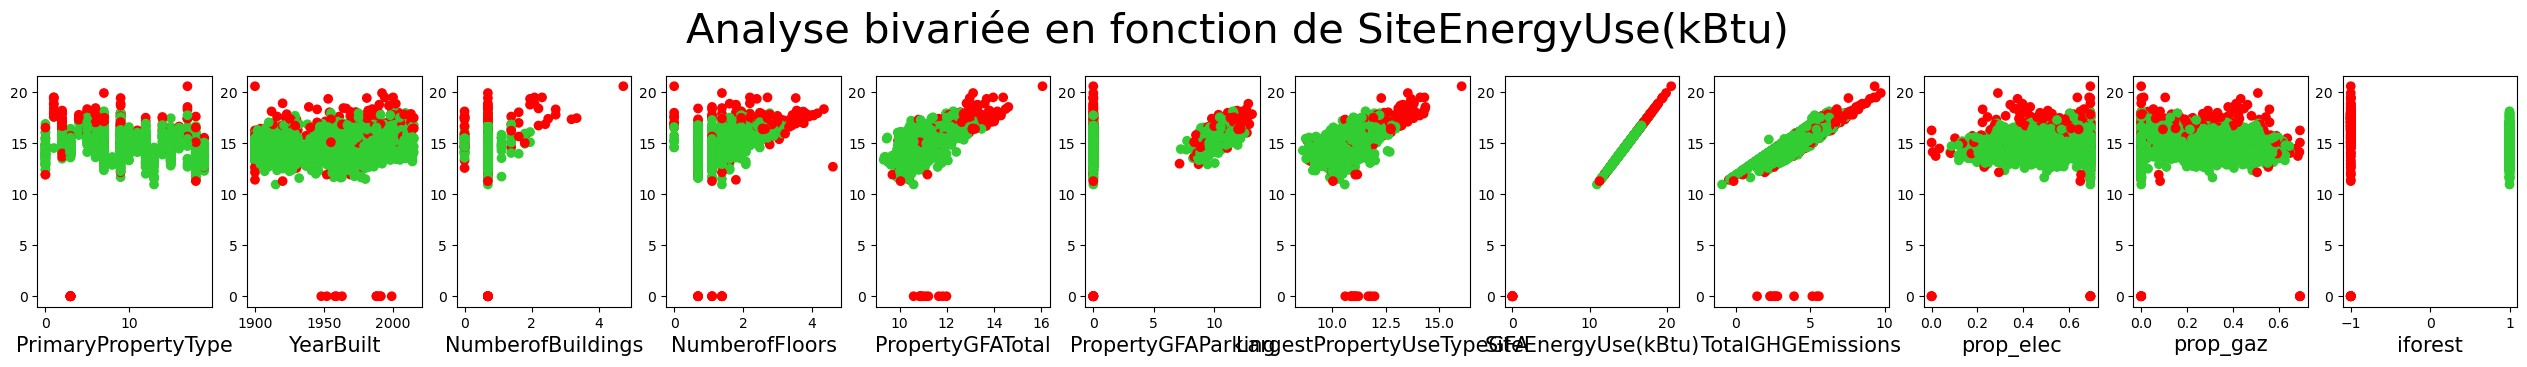

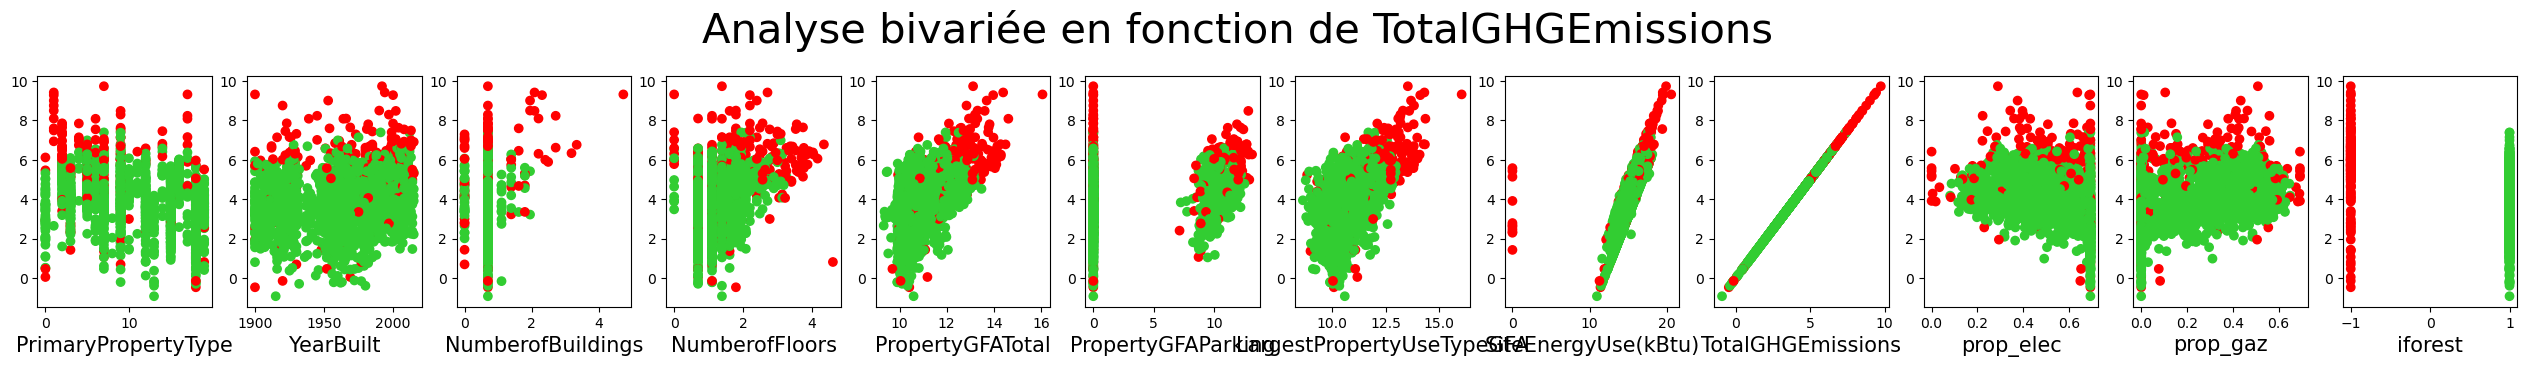

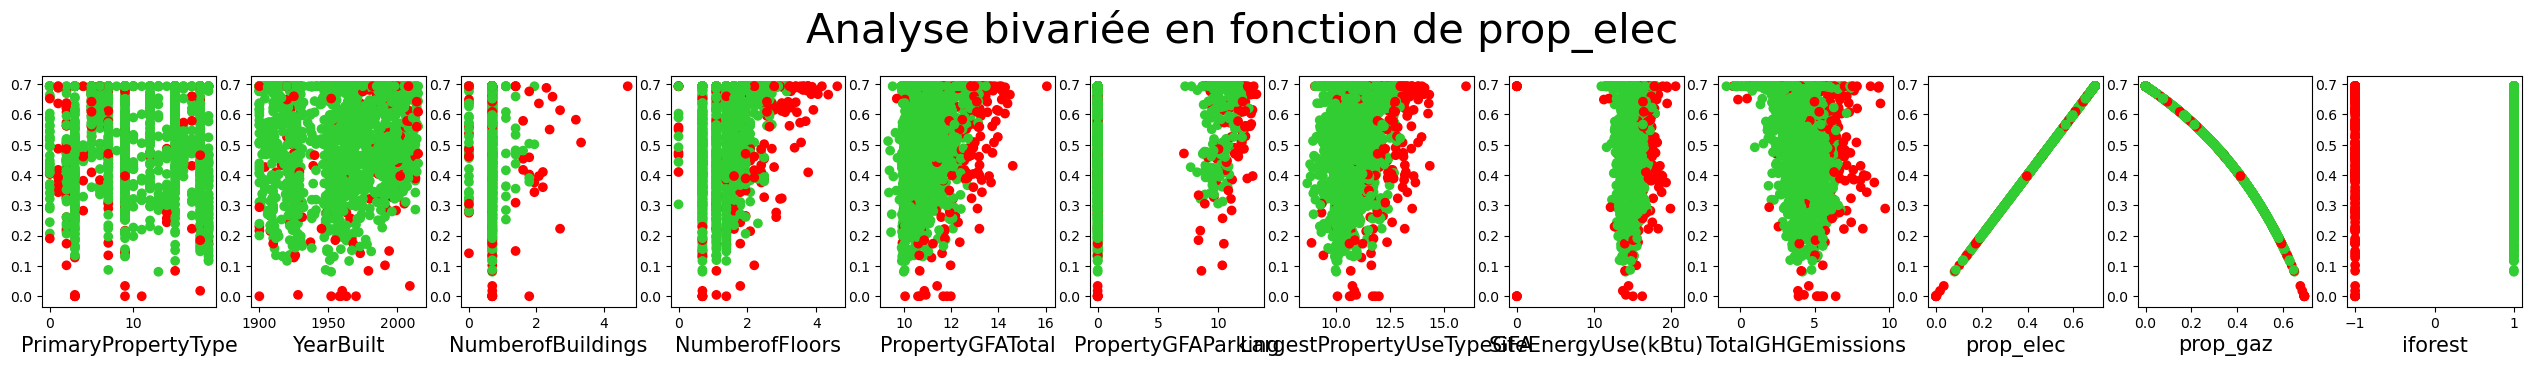

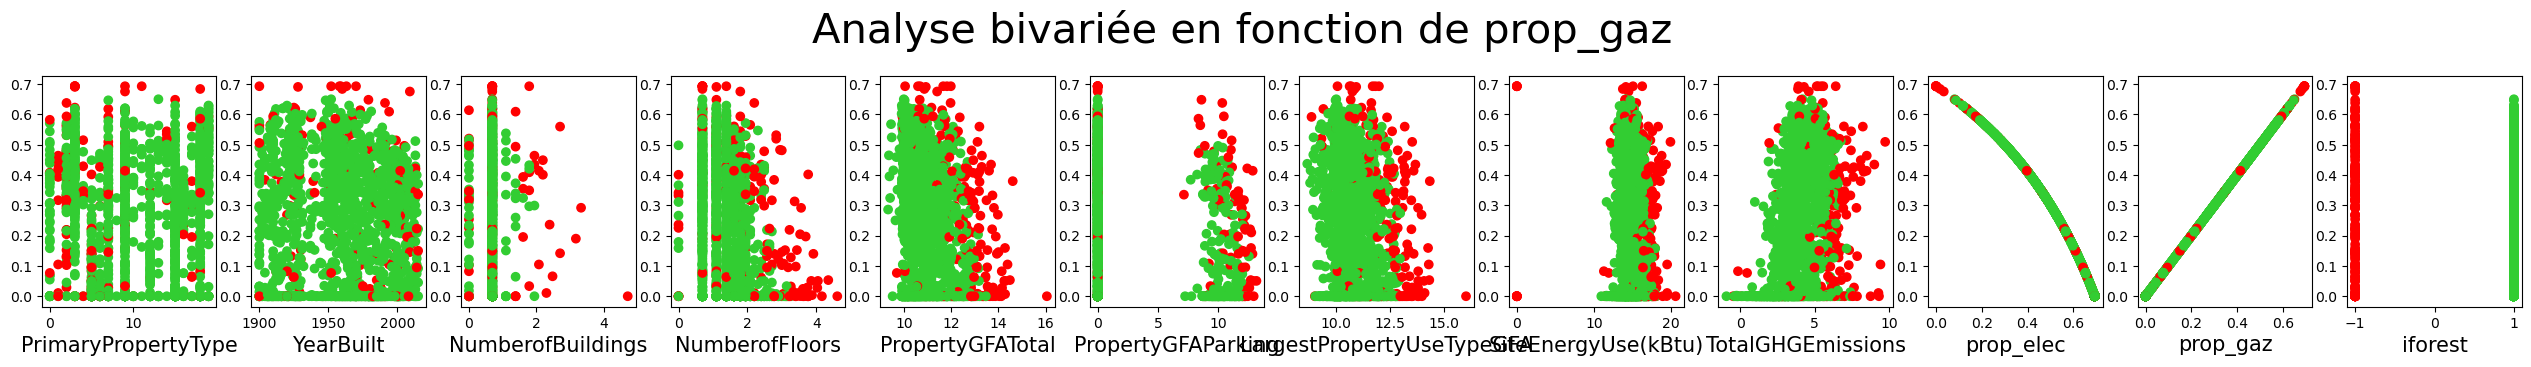

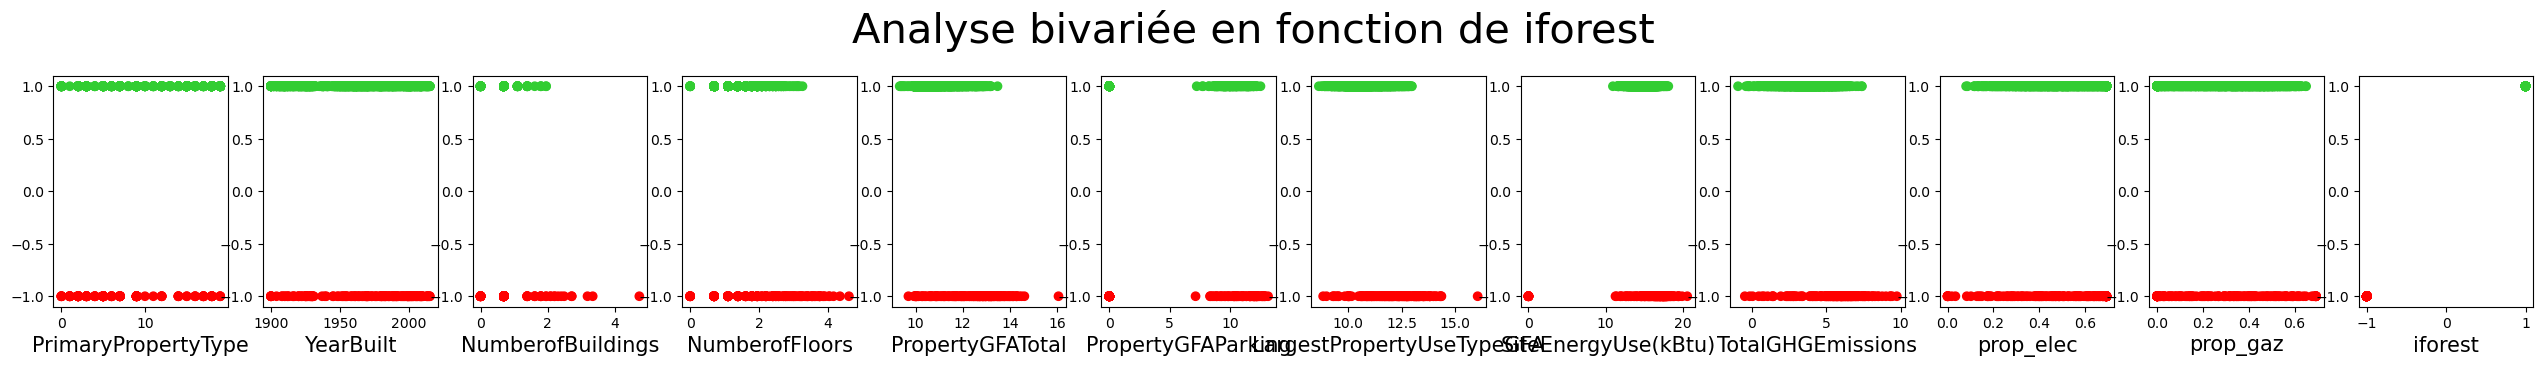

In [69]:
liste = []

for c in dfw.columns:
    if dfw[c].dtypes != 'object':
        liste.append(c)

colors = np.where(dfw.iforest == 1, 'limegreen', 'red')     
        
dft = dfw.loc[:,liste]
for c in range(len(dft.columns)):
    f, ax = plt.subplots(nrows=1, ncols=dft.shape[1], figsize=(32,3))
    for i in range(len(dfw.columns)):
        plt.suptitle('Analyse bivariée en fonction de {}'.format(dfw.columns[c]), fontsize=30, y=1.1)
        ax[i].scatter(dfw.iloc[:,[i]], dfw.iloc[:,[c]], c=colors)
        ax[i].set_xlabel(dfw.columns[i], fontsize=15)
    #plt.savefig("iforest_bivarie_"+dft.columns[c]+".png", bbox_inches='tight', transparent=True)
    plt.show()

In [70]:
iforest = dfw[dfw.iforest == -1].index
dfl = dfl[~dfl.index.isin(iforest)]

In [71]:
dfl.reset_index(inplace=True, drop=True)

L'algorithme Isolation forest a considéré 187 lignes comme étant anormales.<br/>
Nous les avons supprimer des données que nous allons garder pour entraîner notre modèle.

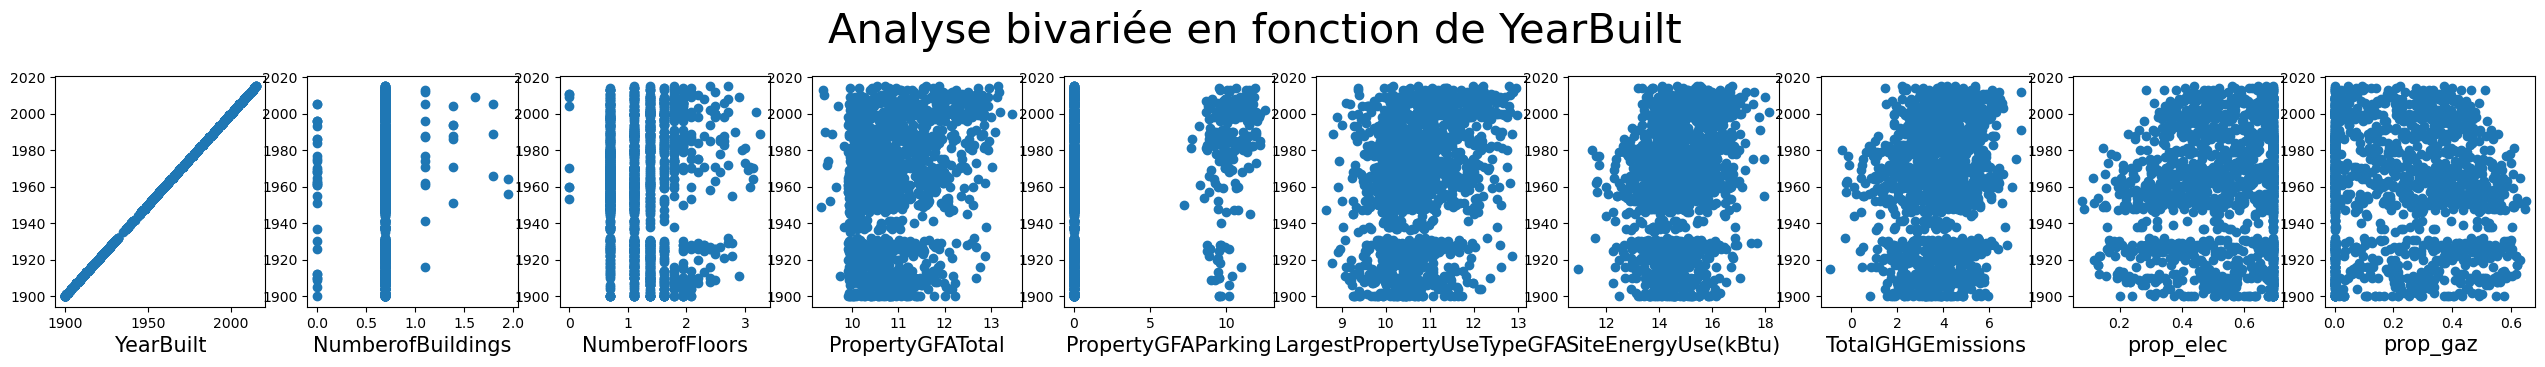

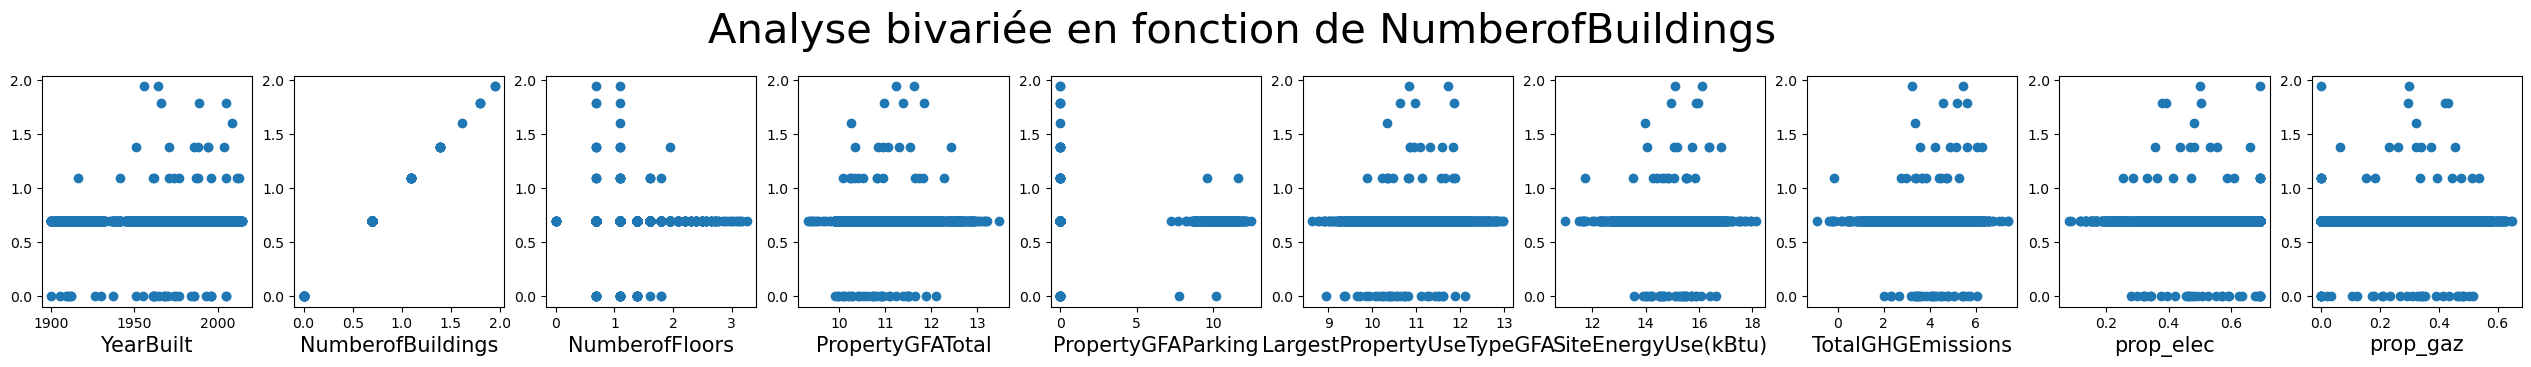

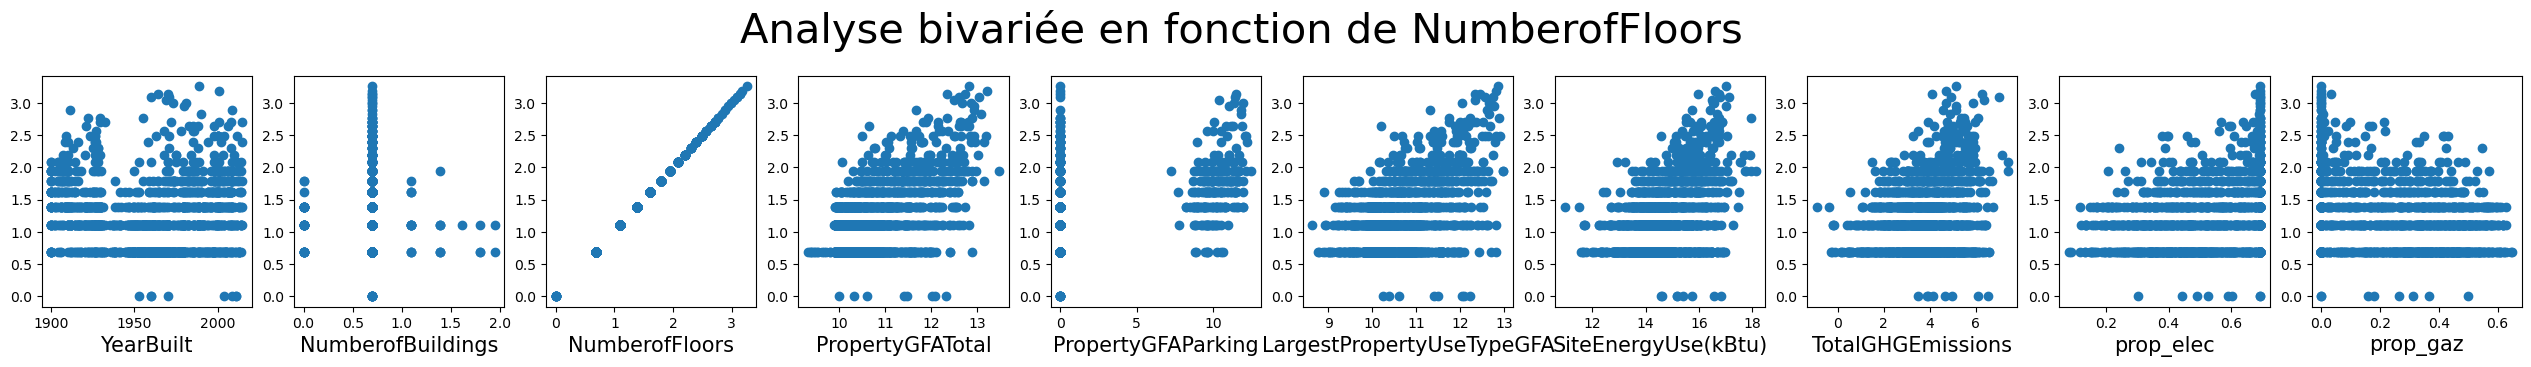

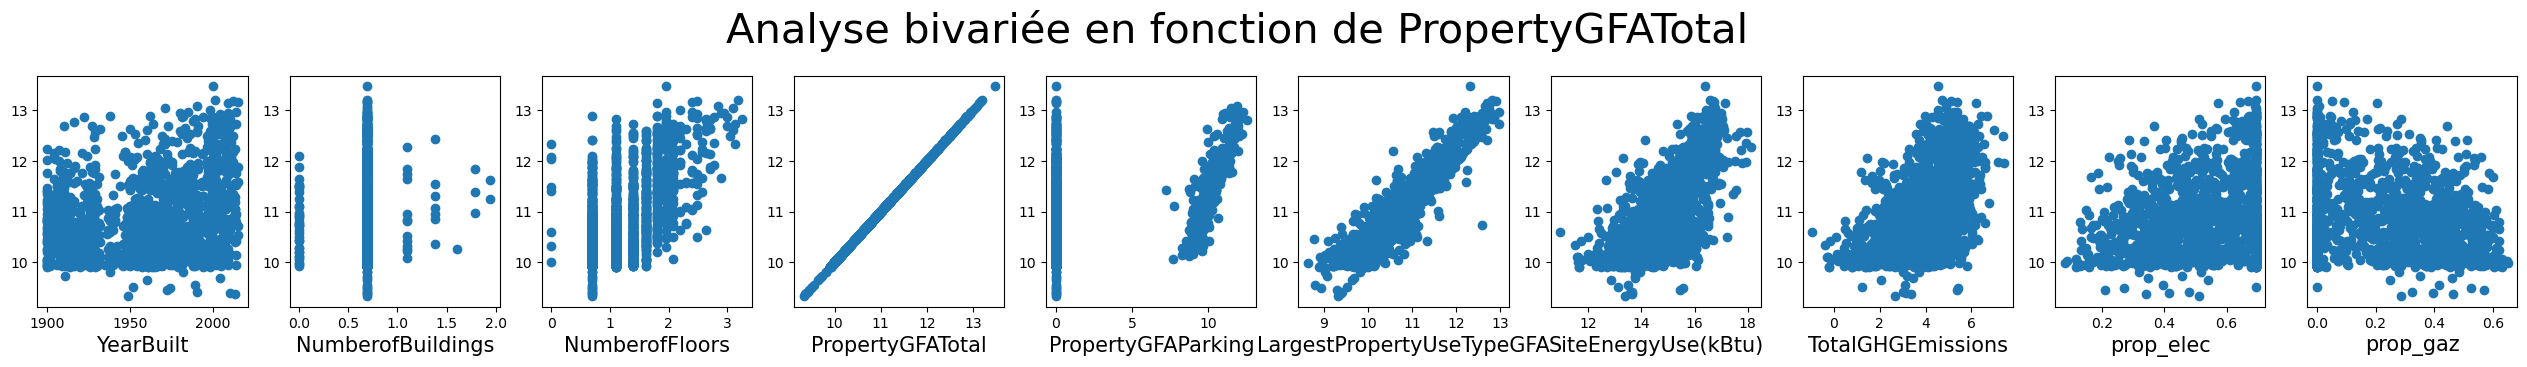

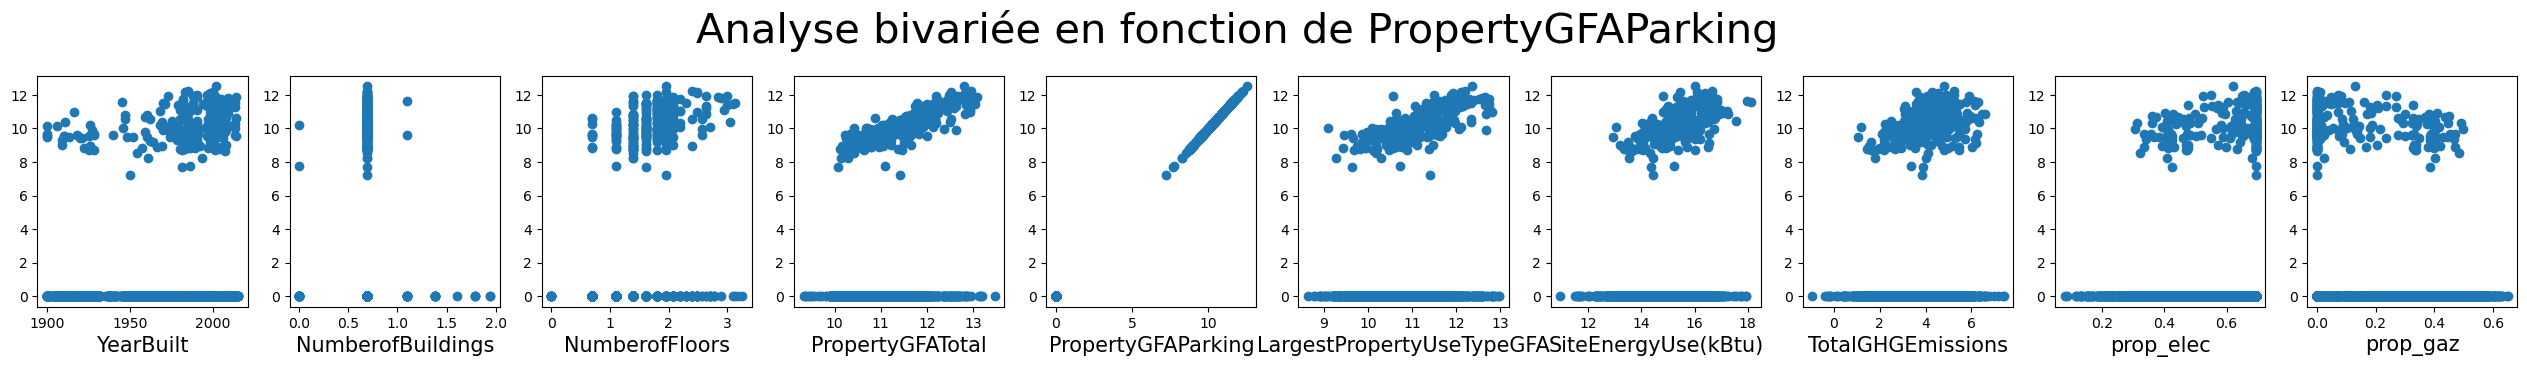

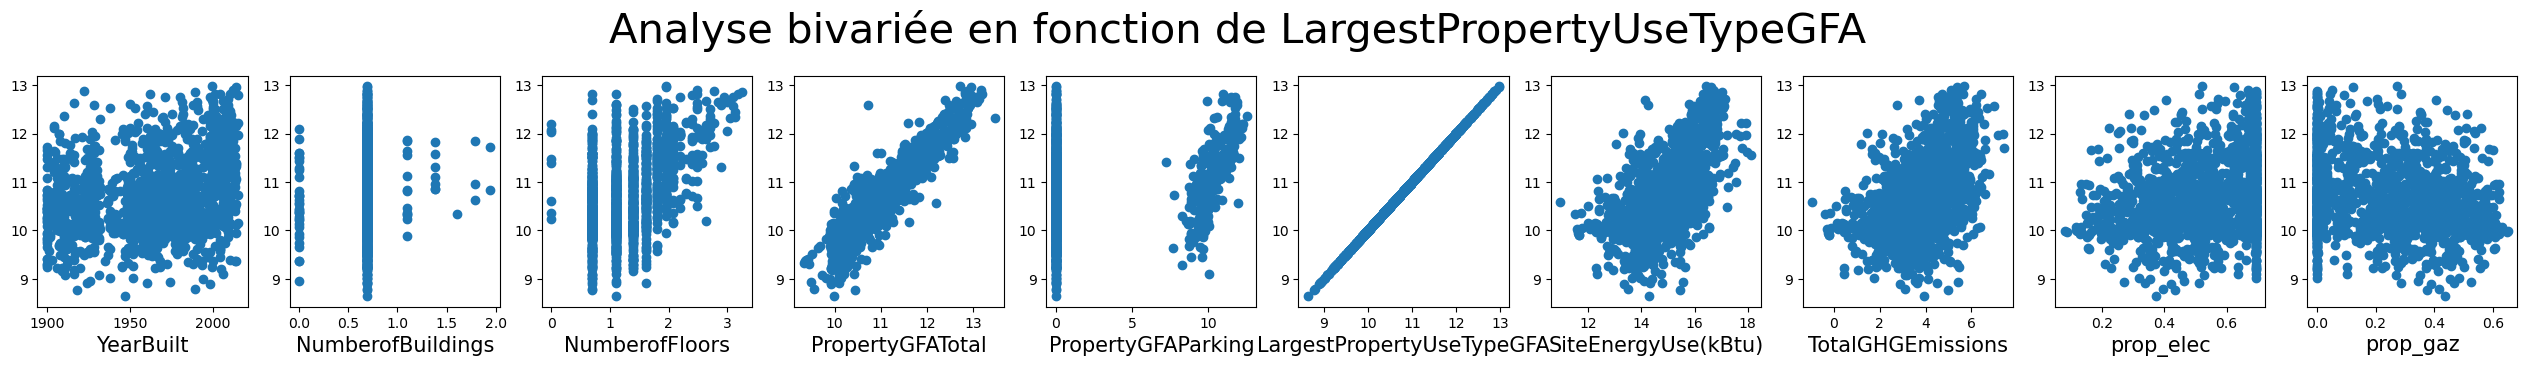

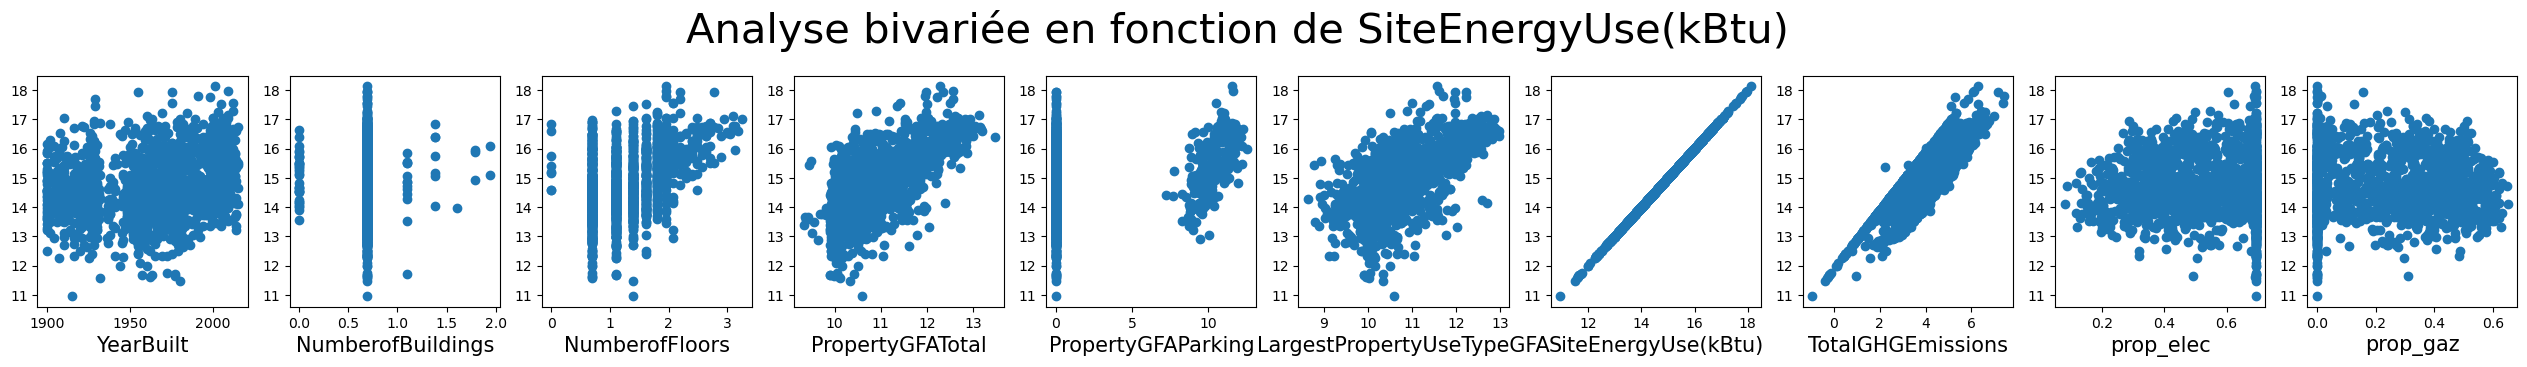

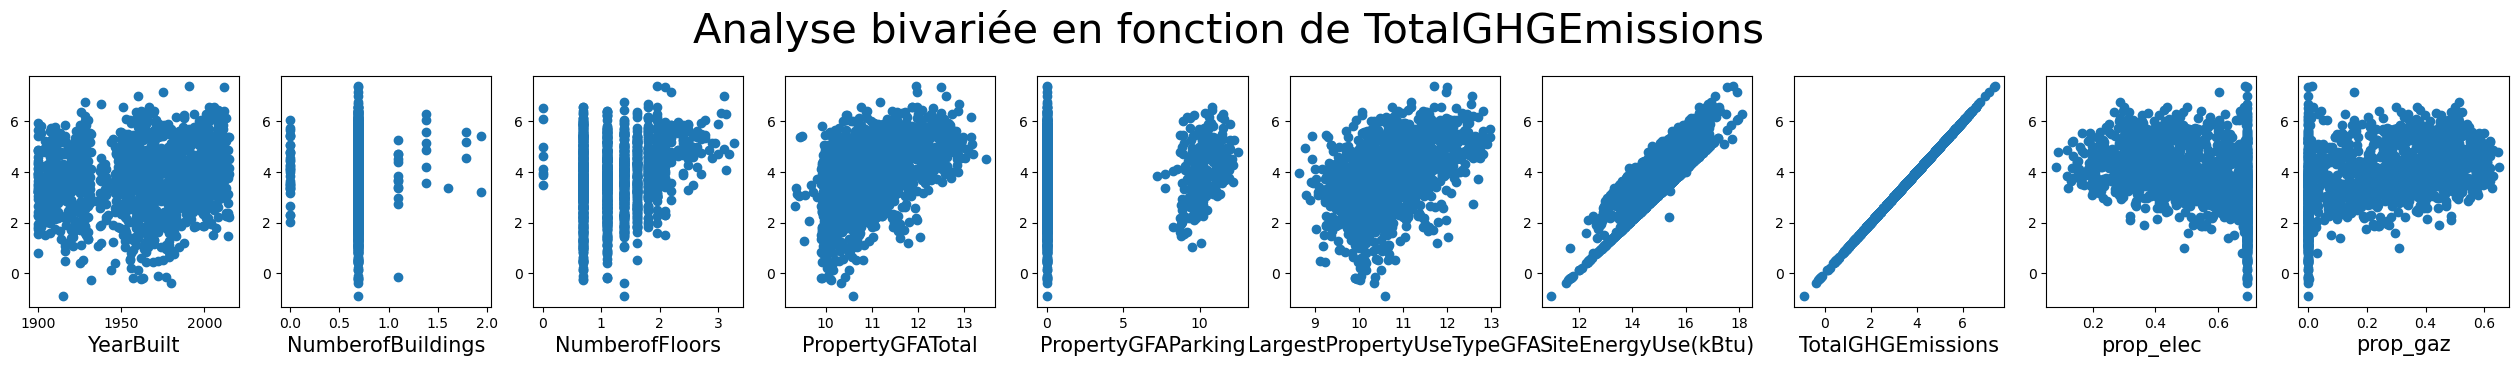

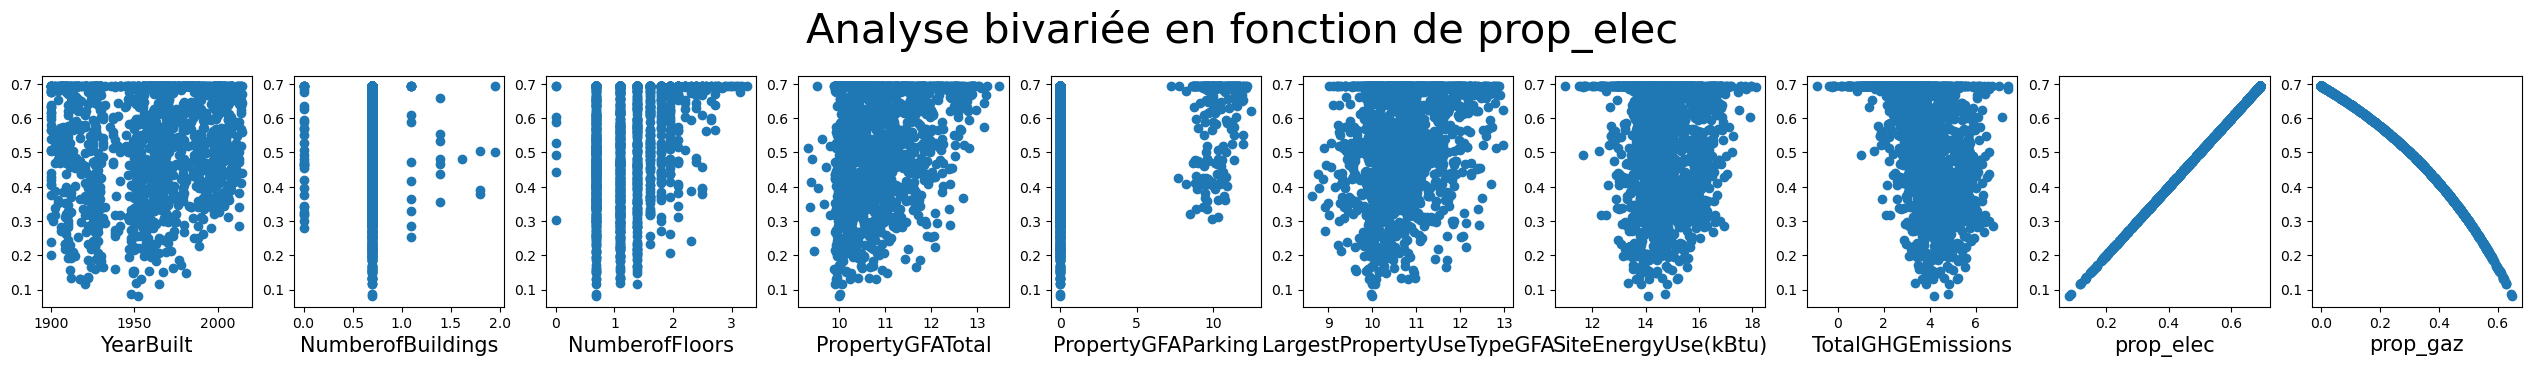

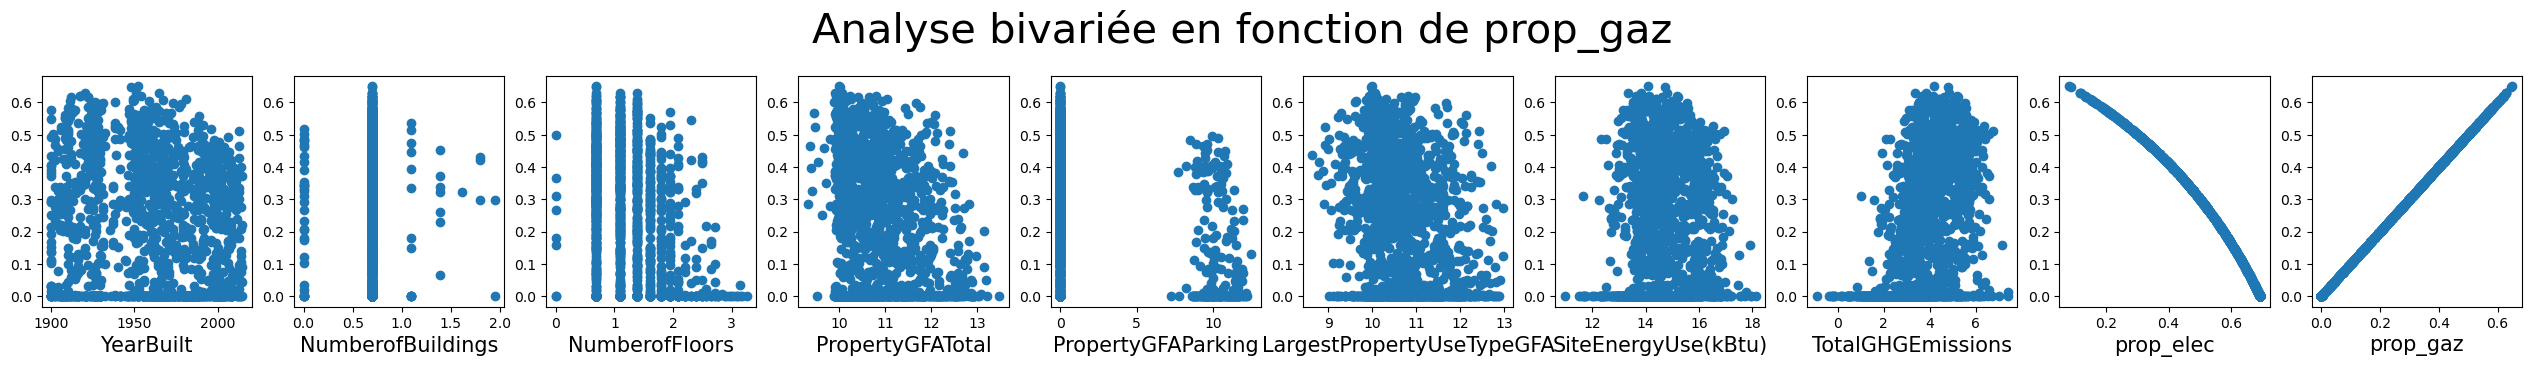

In [72]:
liste = []

for c in dfl.columns:
    if dfl[c].dtypes != 'object':
        liste.append(c)

dft = dfl.loc[:,liste]
for c in range(len(dft.columns)):
    f, ax = plt.subplots(nrows=1, ncols=dft.shape[1], figsize=(32,3))
    for i in range(len(dft.columns)):
        plt.suptitle('Analyse bivariée en fonction de {}'.format(dft.columns[c]), fontsize=30, y=1.1)
        ax[i].scatter(dft.iloc[:,[i]], dft.iloc[:,[c]])
        ax[i].set_xlabel(dft.columns[i], fontsize=15)
    #plt.savefig("bivarie_definitive_"+dft.columns[c]+".png", bbox_inches='tight', transparent=True)
    plt.show()

##### [sommaire](#S)

### E, Test de normalité des variables energie et GHGE <a class='anchor' id='IIIE'></a>

In [73]:
mu, sigma = 0, 0.1

s = np.random.normal(mu, sigma, 1000)

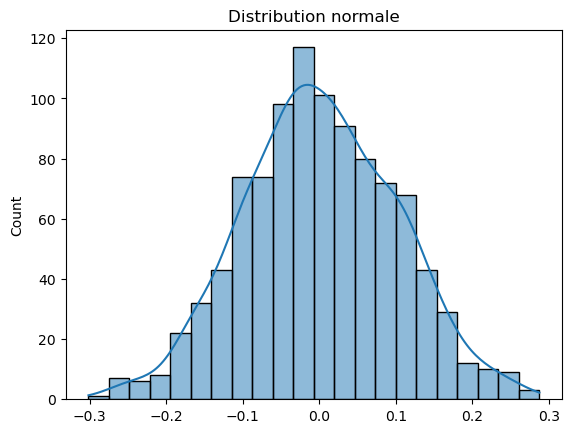

In [74]:
sns.histplot(x=s, kde=True)
plt.title('Distribution normale')
#plt.savefig("distribution normale.png", bbox_inches='tight', transparent=True)
plt.show()

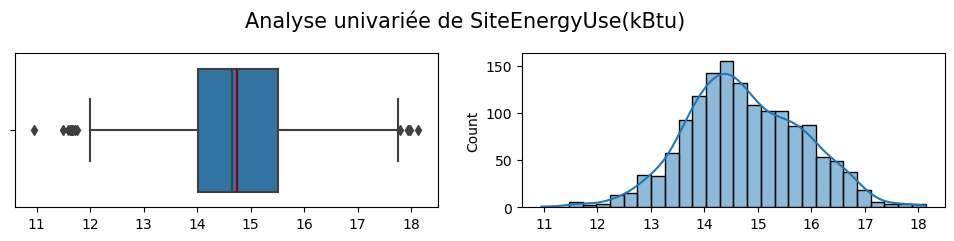

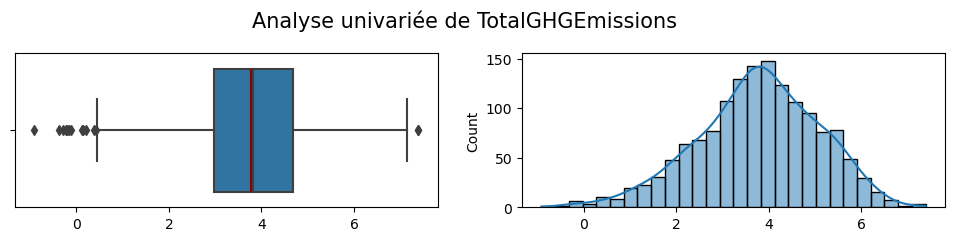

In [75]:
for c in ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']:
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,2))
    plt.suptitle("Analyse univariée de {}".format(c), fontsize=15, y=1.1)
    g1 = sns.boxplot(x=c, data=dfl, ax=ax[0])
    g1.vlines(dfl[c].mean(), ymin=-0.4, ymax=0.4, color='darkred')
    g1.set(xlabel=None)
    g2 = sns.histplot(x=c, data=dfl, kde=True, ax=ax[1])
    g2.set(xlabel=None)
    #plt.savefig("univarie_log_gauss_"+c+".png", bbox_inches='tight', transparent=True)
    plt.show()

In [76]:
from scipy.stats import normaltest, shapiro, anderson

In [77]:
for c in ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']:
    stat, p = normaltest(dfl[c])
    print("Normaltest", c)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print('-----------------------------------------------------')


Normaltest TotalGHGEmissions
Statistics=22.199, p=0.000
Sample does not look Gaussian (reject H0)
-----------------------------------------------------
Normaltest SiteEnergyUse(kBtu)
Statistics=2.304, p=0.316
Sample looks Gaussian (fail to reject H0)
-----------------------------------------------------


In [78]:
for c in ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']:
    stat, p = shapiro(dfl[c])
    print("Shapiro", c)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print('-----------------------------------------------------')

Shapiro TotalGHGEmissions
Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)
-----------------------------------------------------
Shapiro SiteEnergyUse(kBtu)
Statistics=0.996, p=0.001
Sample does not look Gaussian (reject H0)
-----------------------------------------------------


In [79]:
for c in ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']:
    result = anderson(dfl[c])
    print('Anderson', c)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
    print('-----------------------------------------------------')

Anderson TotalGHGEmissions
Statistic: 1.994
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)
-----------------------------------------------------
Anderson SiteEnergyUse(kBtu)
Statistic: 2.556
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)
-----------------------------------------------------


Seul le test d'Agostino et Pearson conclu à la normalité de la distribution de la variable énergie. <br/>
Les autres tests rejettent cette hypothèse. Aussi, nous allons suivre la majorité des résultats.

##### [sommaire](#S)

### F, Analyses finales <a class='anchor' id='IIIF'></a>

#### 1, Entres données quantitatives

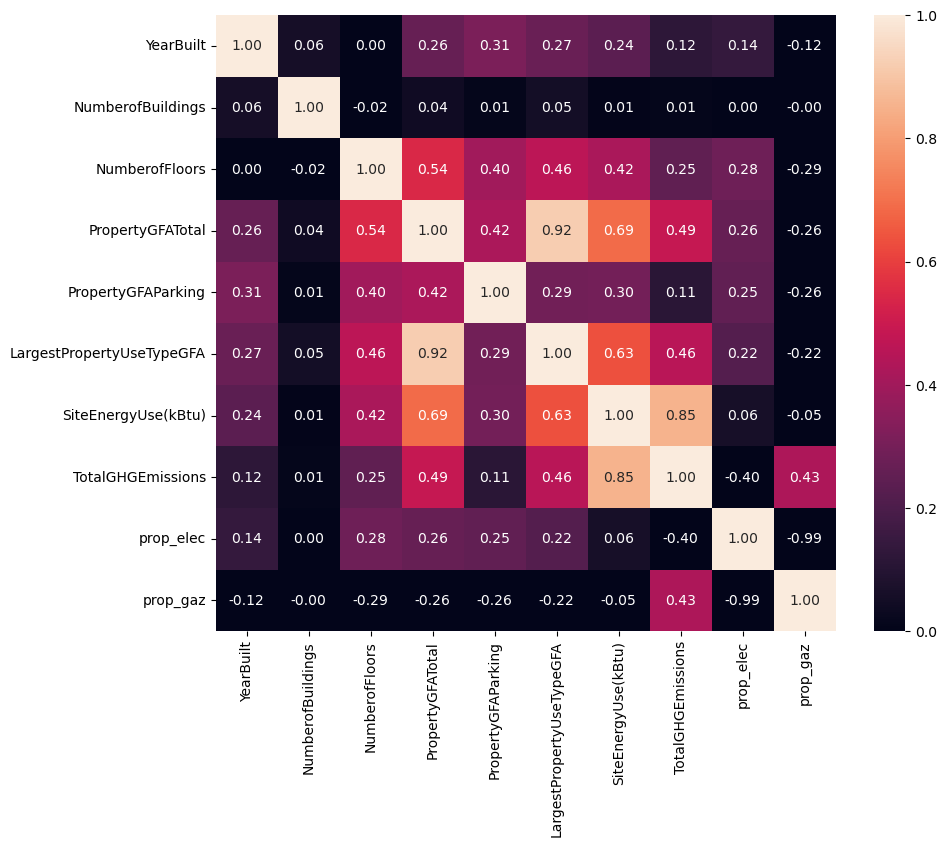

In [80]:
corr = dfl.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmin=0, vmax=1, center=0.5, annot=True, cmap='rocket', fmt='.2f')
plt.xticks(rotation=90)
#plt.savefig("correlation.png", bbox_inches='tight', transparent=True)
plt.show()

Les analyses bivariées des données quantitatives laissent apparaître des corrélations intéressantes notamment entre la taille des propriétés et la consommation d'énergie.

##### [sommaire](#S)

#### 2, Entre données quantitatives et qualitative

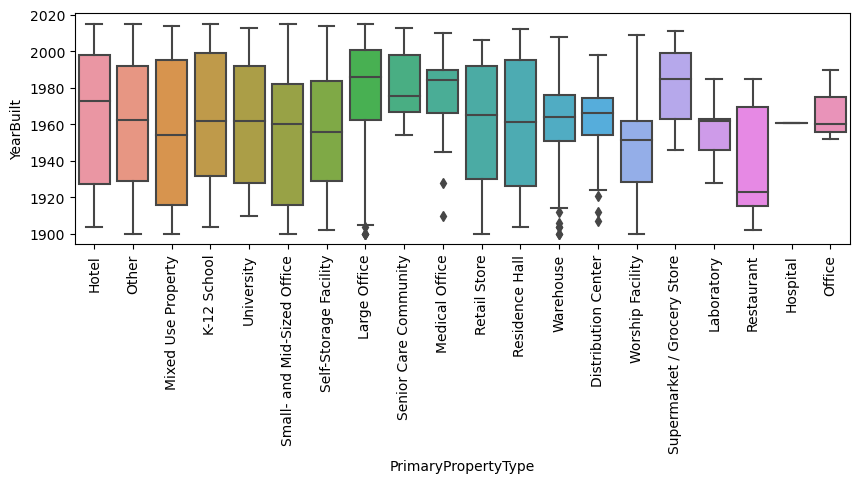

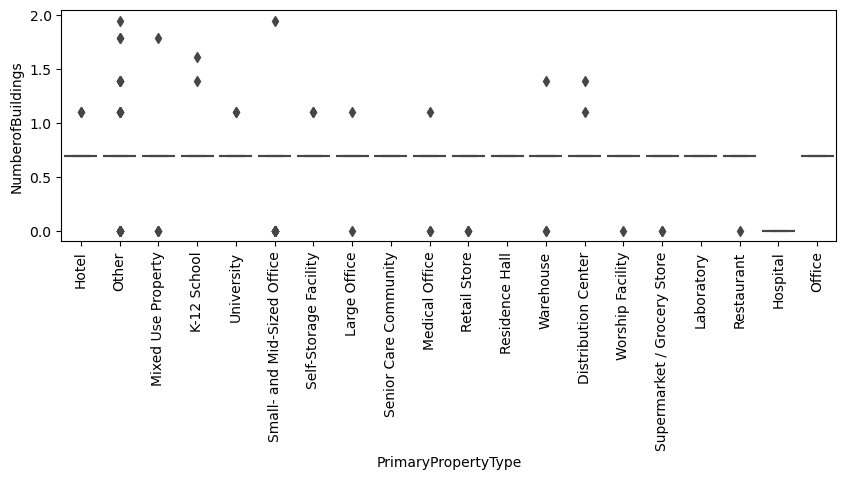

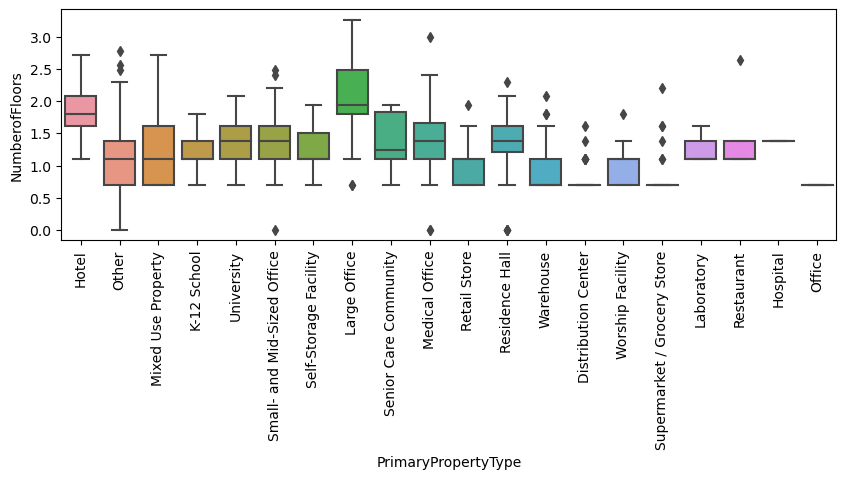

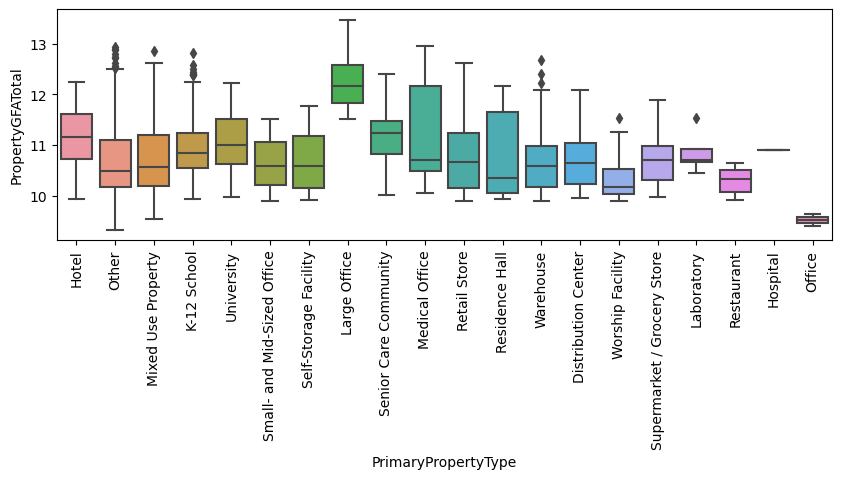

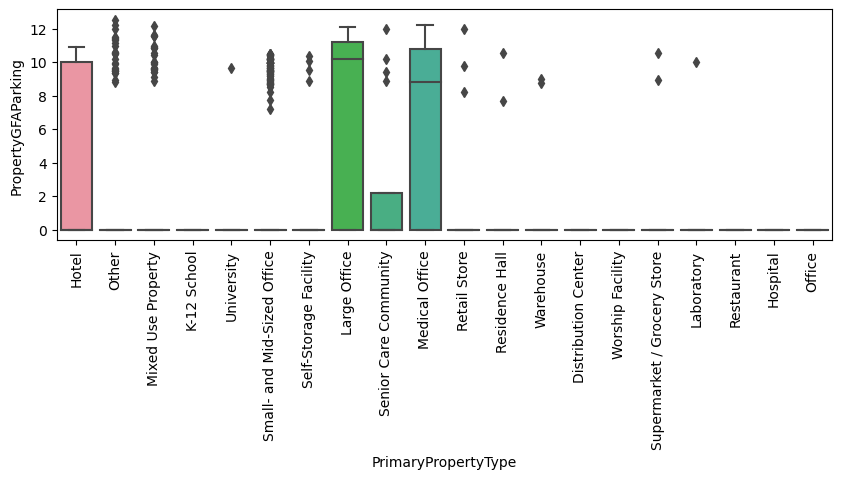

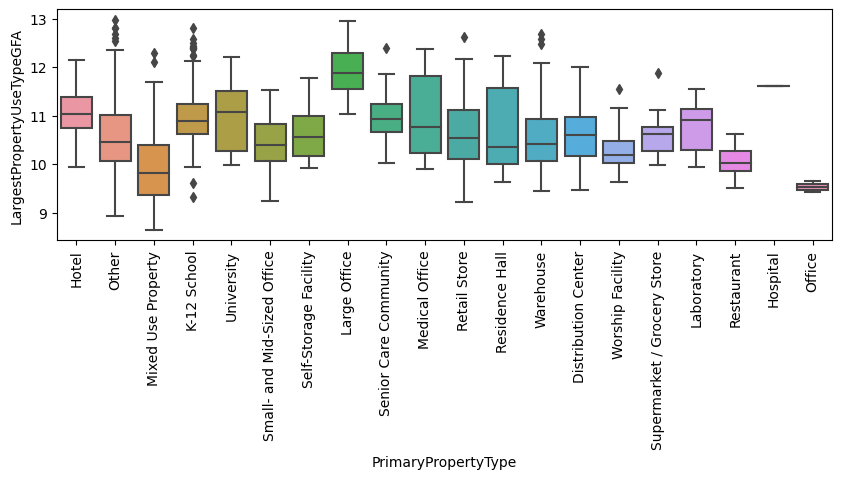

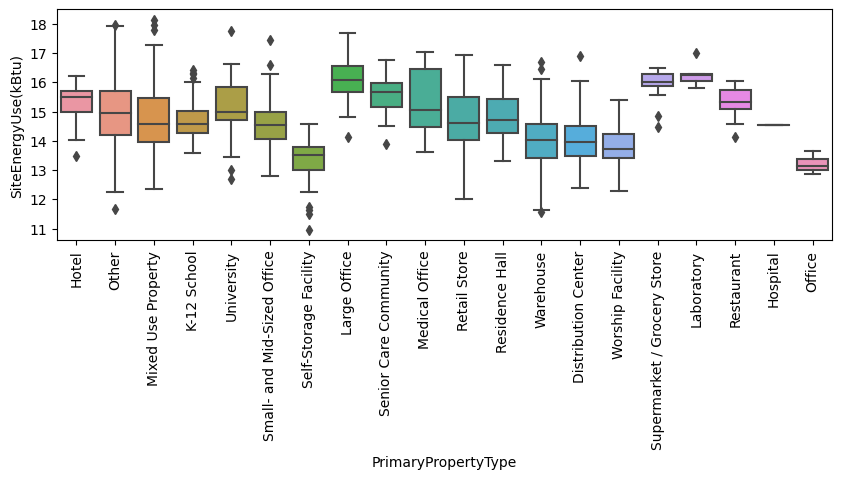

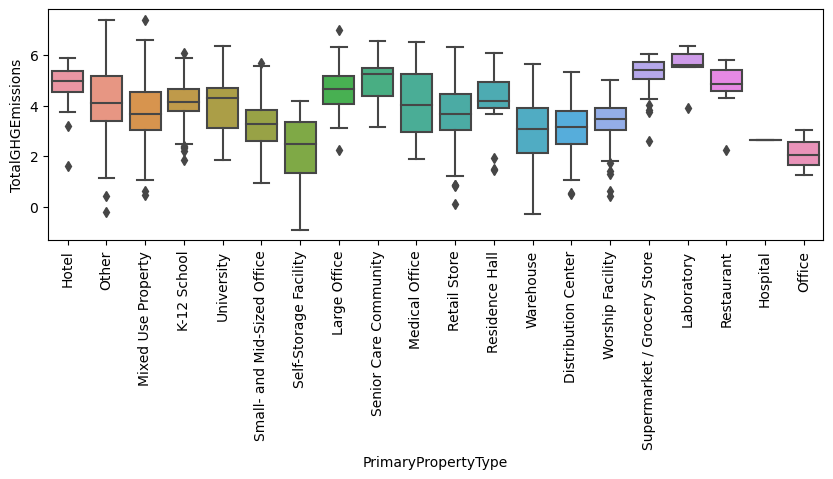

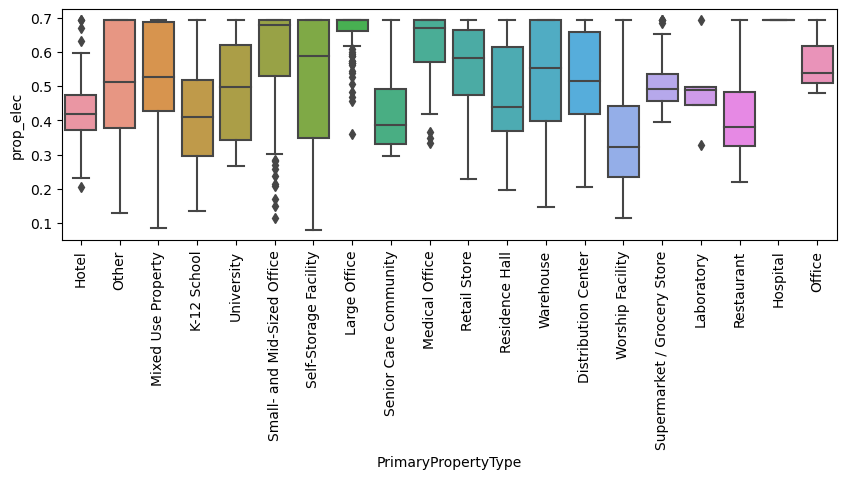

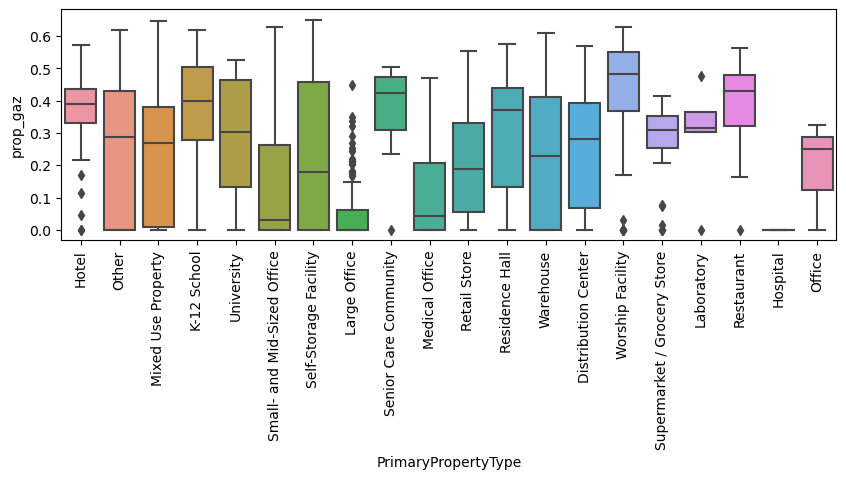

In [81]:
x= []
y = []
for c in dfl.columns:
    if dfl[c].dtypes == 'object':
        x.append(c)
    else:
        y.append(c)
        
for i in x:
    for j in y:
        plt.figure(figsize=(10,3))
        sns.boxplot(x=i, y=j, data=dfl)
        plt.xticks(rotation=90)
        #plt.savefig("boxplot_property_type_"+j+".png", bbox_inches='tight', transparent=True)
        plt.show()

In [82]:
import statsmodels.formula.api as smf
for i in ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']:
    anova = smf.ols('dfl[i]~PrimaryPropertyType', data=dfl).fit()
    print(i)
    print(anova.summary())
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

TotalGHGEmissions
                            OLS Regression Results                            
Dep. Variable:                 dfl[i]   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     27.37
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           7.60e-83
Time:                        11:54:02   Log-Likelihood:                -2247.5
No. Observations:                1468   AIC:                             4535.
Df Residuals:                    1448   BIC:                             4641.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Les analyses entre les variables quantitatives et la variable qualitative ne montrent pas de correlation particulière autre que le hasard.<br/>
P-value forte et F value faible.

In [83]:
dfl.shape

(1468, 11)

In [84]:
dfl.to_csv('dfl.csv')

##### [sommaire](#S)